# LOCA Precip Compare: Wet Days

Compare the wet day spell length distributions and samples among the four analysis periods for LOCA archive.

The purpose of this notebook is purely to compare the datasets.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

Parameters, primarily input file names

In [3]:
JAN_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jan_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
FEB_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Feb_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
MAR_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Mar_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
APR_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Apr_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
MAY_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\May_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
JUN_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jun_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
JUL_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jul_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
AUG_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Aug_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
SEP_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Sep_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
OCT_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Oct_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
NOV_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Nov_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'
DEC_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Dec_Wet' \
               r'Cnt_CMIP5_1981-2010.pickle'

In [13]:
JAN_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Jan_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
FEB_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Feb_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
MAR_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Mar_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
APR_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Apr_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
MAY_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\May_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
JUN_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Jun_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
JUL_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Jul_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
AUG_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Aug_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
SEP_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Sep_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
OCT_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Oct_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
NOV_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Nov_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'
DEC_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Dec_Wet' \
               r'Cnt_CMIP5_LOCA_2011-2040.pickle'

In [14]:
JAN_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Jan_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
FEB_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Feb_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
MAR_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Mar_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
APR_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Apr_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
MAY_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\May_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
JUN_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Jun_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
JUL_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Jul_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
AUG_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Aug_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
SEP_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Sep_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
OCT_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Oct_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
NOV_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Nov_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'
DEC_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Dec_Wet' \
               r'Cnt_CMIP5_LOCA_2041-2070.pickle'

In [15]:
JAN_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Jan_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
FEB_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Feb_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
MAR_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Mar_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
APR_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Apr_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
MAY_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\May_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
JUN_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Jun_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
JUL_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Jul_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
AUG_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Aug_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
SEP_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Sep_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
OCT_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Oct_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
NOV_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Nov_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'
DEC_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
               r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Dec_Wet' \
               r'Cnt_CMIP5_LOCA_2071-2100.pickle'

In [7]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\Precip_Compare_1981-2010'

In [8]:
LOCA_GRID_END = 168       # the last LOCA grid cell

## Load Files

### Load and Reduce DataFrames

In [9]:
JANCmipDF = pd.read_pickle( JAN_D1_IN )
FEBCmipDF = pd.read_pickle( FEB_D1_IN )
MARCmipDF = pd.read_pickle( MAR_D1_IN )
APRCmipDF = pd.read_pickle( APR_D1_IN )
MAYCmipDF = pd.read_pickle( MAY_D1_IN )
JUNCmipDF = pd.read_pickle( JUN_D1_IN )
JULCmipDF = pd.read_pickle( JUL_D1_IN )
AUGCmipDF = pd.read_pickle( AUG_D1_IN )
SEPCmipDF = pd.read_pickle( SEP_D1_IN )
OCTCmipDF = pd.read_pickle( OCT_D1_IN )
NOVCmipDF = pd.read_pickle( NOV_D1_IN )
DECCmipDF = pd.read_pickle( DEC_D1_IN )

In [10]:
JanD1DF = JANCmipDF[JANCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
FebD1DF = FEBCmipDF[FEBCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
MarD1DF = MARCmipDF[MARCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
AprD1DF = APRCmipDF[APRCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
MayD1DF = MAYCmipDF[MAYCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
JunD1DF = JUNCmipDF[JUNCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
JulD1DF = JULCmipDF[JULCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
AugD1DF = AUGCmipDF[AUGCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
SepD1DF = SEPCmipDF[SEPCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
OctD1DF = OCTCmipDF[OCTCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
NovD1DF = NOVCmipDF[NOVCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()
DecD1DF = DECCmipDF[DECCmipDF["Grid_Id"] <= LOCA_GRID_END].copy()

In [11]:
del JANCmipDF
del FEBCmipDF
del MARCmipDF
del APRCmipDF
del MAYCmipDF
del JUNCmipDF
del JULCmipDF
del AUGCmipDF
del SEPCmipDF
del OCTCmipDF
del NOVCmipDF
del DECCmipDF

In [16]:
JanP1DF = pd.read_pickle( JAN_P1_IN )
FebP1DF = pd.read_pickle( FEB_P1_IN )
MarP1DF = pd.read_pickle( MAR_P1_IN )
AprP1DF = pd.read_pickle( APR_P1_IN )
MayP1DF = pd.read_pickle( MAY_P1_IN )
JunP1DF = pd.read_pickle( JUN_P1_IN )
JulP1DF = pd.read_pickle( JUL_P1_IN )
AugP1DF = pd.read_pickle( AUG_P1_IN )
SepP1DF = pd.read_pickle( SEP_P1_IN )
OctP1DF = pd.read_pickle( OCT_P1_IN )
NovP1DF = pd.read_pickle( NOV_P1_IN )
DecP1DF = pd.read_pickle( DEC_P1_IN )

In [17]:
JanP2DF = pd.read_pickle( JAN_P2_IN )
FebP2DF = pd.read_pickle( FEB_P2_IN )
MarP2DF = pd.read_pickle( MAR_P2_IN )
AprP2DF = pd.read_pickle( APR_P2_IN )
MayP2DF = pd.read_pickle( MAY_P2_IN )
JunP2DF = pd.read_pickle( JUN_P2_IN )
JulP2DF = pd.read_pickle( JUL_P2_IN )
AugP2DF = pd.read_pickle( AUG_P2_IN )
SepP2DF = pd.read_pickle( SEP_P2_IN )
OctP2DF = pd.read_pickle( OCT_P2_IN )
NovP2DF = pd.read_pickle( NOV_P2_IN )
DecP2DF = pd.read_pickle( DEC_P2_IN )

In [18]:
JanP3DF = pd.read_pickle( JAN_P3_IN )
FebP3DF = pd.read_pickle( FEB_P3_IN )
MarP3DF = pd.read_pickle( MAR_P3_IN )
AprP3DF = pd.read_pickle( APR_P3_IN )
MayP3DF = pd.read_pickle( MAY_P3_IN )
JunP3DF = pd.read_pickle( JUN_P3_IN )
JulP3DF = pd.read_pickle( JUL_P3_IN )
AugP3DF = pd.read_pickle( AUG_P3_IN )
SepP3DF = pd.read_pickle( SEP_P3_IN )
OctP3DF = pd.read_pickle( OCT_P3_IN )
NovP3DF = pd.read_pickle( NOV_P3_IN )
DecP3DF = pd.read_pickle( DEC_P3_IN )

In [19]:
display( HTML( OctD1DF.head().to_html() ) )

,MGrid_Id,Year,Month,Day,Wet_Count,Total_Depth,Grid_Id,Model_Id
714710,M10_1,1981,10,1,3,7.994943,1,10
714711,M10_1,1981,10,6,3,12.686037,1,10
714712,M10_1,1981,10,11,1,1.783598,1,10
714713,M10_1,1981,10,18,4,5.306399,1,10
714714,M10_1,1981,10,23,11,49.151998,1,10


In [20]:
display( HTML( OctP2DF.head().to_html() ) )

,MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Wet_Count,Model_Id
25,M10_1,1,10,2041,10,9,1,10
26,M10_1,1,10,2041,10,12,2,10
27,M10_1,1,10,2041,10,24,3,10
68,M10_1,1,10,2042,10,1,2,10
69,M10_1,1,10,2042,10,11,1,10


In [21]:
Test1 = OctD1DF[OctD1DF["Grid_Id"] == 92].copy()

In [22]:
UniqMods = sorted( Test1["MGrid_Id"].unique() )
len(UniqMods)

64

In [23]:
Test2 = OctP1DF[OctP1DF["Grid_Id"] == 92].copy()

In [24]:
UniqMods = sorted( Test2["MGrid_Id"].unique() )
len(UniqMods)

64

In [25]:
Test3 = OctP2DF[OctP2DF["Grid_Id"] == 92].copy()

In [26]:
UniqMods = sorted( Test3["MGrid_Id"].unique() )
len(UniqMods)

64

In [27]:
Test4 = OctP3DF[OctP3DF["Grid_Id"] == 92].copy()

In [28]:
UniqMods = sorted( Test4["MGrid_Id"].unique() )
len(UniqMods)

64

## Comparisons by Month

In [29]:
SD1Mean = list()
SD1MeanMinCI = list()
SD1MeanMaxCI = list()
SD1Var = list()
SD1VarMinCI = list()
SD1VarMaxCI = list()
SD1Std = list()
SD1StdMinCI = list()
SD1StdMaxCI = list()

In [30]:
SP1Mean = list()
SP1MeanMinCI = list()
SP1MeanMaxCI = list()
SP1Var = list()
SP1VarMinCI = list()
SP1VarMaxCI = list()
SP1Std = list()
SP1StdMinCI = list()
SP1StdMaxCI = list()

In [31]:
SP2Mean = list()
SP2MeanMinCI = list()
SP2MeanMaxCI = list()
SP2Var = list()
SP2VarMinCI = list()
SP2VarMaxCI = list()
SP2Std = list()
SP2StdMinCI = list()
SP2StdMaxCI = list()

In [32]:
SP3Mean = list()
SP3MeanMinCI = list()
SP3MeanMaxCI = list()
SP3Var = list()
SP3VarMinCI = list()
SP3VarMaxCI = list()
SP3Std = list()
SP3StdMinCI = list()
SP3StdMaxCI = list()

In [33]:
CompQs = [ round(x * 0.05, 2) for x in range(21) ]
nCompQs = np.array( CompQs, dtype=np.float32 )
nCompQs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float32)

### Jan

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [34]:
JanD1BSCI = sstats.bayes_mvs( np.array( JanD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [35]:
JanD1BSCI

(Mean(statistic=1.862078249446739, minmax=(1.8601583099332446, 1.8639981889602333)),
 Variance(statistic=1.3815079717544738, minmax=(1.3783165864402926, 1.384699357068655)),
 Std_dev(statistic=1.1753756726061986, minmax=(1.1740180703567387, 1.1767332748556585)))

In [36]:
JanD1BSCI[0][0], JanD1BSCI[0][1][0], JanD1BSCI[0][1][1]

(1.862078249446739, 1.8601583099332446, 1.8639981889602333)

In [37]:
SD1Mean.append( JanD1BSCI[0][0] )
SD1MeanMinCI.append( JanD1BSCI[0][1][0] )
SD1MeanMaxCI.append( JanD1BSCI[0][1][1] )
SD1Var.append( JanD1BSCI[1][0] )
SD1VarMinCI.append( JanD1BSCI[1][1][0] )
SD1VarMaxCI.append( JanD1BSCI[1][1][1] )
SD1Std.append( JanD1BSCI[2][0] )
SD1StdMinCI.append( JanD1BSCI[2][1][0] )
SD1StdMaxCI.append( JanD1BSCI[2][1][1] )

In [38]:
JanP1BSCI = sstats.bayes_mvs( np.array( JanP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [39]:
SP1Mean.append( JanP1BSCI[0][0] )
SP1MeanMinCI.append( JanP1BSCI[0][1][0] )
SP1MeanMaxCI.append( JanP1BSCI[0][1][1] )
SP1Var.append( JanP1BSCI[1][0] )
SP1VarMinCI.append( JanP1BSCI[1][1][0] )
SP1VarMaxCI.append( JanP1BSCI[1][1][1] )
SP1Std.append( JanP1BSCI[2][0] )
SP1StdMinCI.append( JanP1BSCI[2][1][0] )
SP1StdMaxCI.append( JanP1BSCI[2][1][1] )

In [40]:
JanP2BSCI = sstats.bayes_mvs( np.array( JanP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [41]:
SP2Mean.append( JanP2BSCI[0][0] )
SP2MeanMinCI.append( JanP2BSCI[0][1][0] )
SP2MeanMaxCI.append( JanP2BSCI[0][1][1] )
SP2Var.append( JanP2BSCI[1][0] )
SP2VarMinCI.append( JanP2BSCI[1][1][0] )
SP2VarMaxCI.append( JanP2BSCI[1][1][1] )
SP2Std.append( JanP2BSCI[2][0] )
SP2StdMinCI.append( JanP2BSCI[2][1][0] )
SP2StdMaxCI.append( JanP2BSCI[2][1][1] )

In [42]:
JanP3BSCI = sstats.bayes_mvs( np.array( JanP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [43]:
SP3Mean.append( JanP3BSCI[0][0] )
SP3MeanMinCI.append( JanP3BSCI[0][1][0] )
SP3MeanMaxCI.append( JanP3BSCI[0][1][1] )
SP3Var.append( JanP3BSCI[1][0] )
SP3VarMinCI.append( JanP3BSCI[1][1][0] )
SP3VarMaxCI.append( JanP3BSCI[1][1][1] )
SP3Std.append( JanP3BSCI[2][0] )
SP3StdMinCI.append( JanP3BSCI[2][1][0] )
SP3StdMaxCI.append( JanP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [44]:
JanTTD1toP1 = sstats.ttest_ind( np.array( JanD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JanP1DF["Wet_Count"], dtype=np.int32 ) )

In [45]:
JanTTD1toP1Pval = JanTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % JanTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 3.61134e-256


In [46]:
JanTTP1toP2 = sstats.ttest_ind( np.array( JanP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JanP2DF["Wet_Count"], dtype=np.int32 ) )

In [47]:
JanTTP1toP2Pval = JanTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % JanTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 3.84977e-38


In [48]:
JanTTP2toP3 = sstats.ttest_ind( np.array( JanP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JanP3DF["Wet_Count"], dtype=np.int32 ) )

In [49]:
JanTTP2toP3Pval = JanTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % JanTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 0.231985


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [50]:
JanMWUD1toP1 = sstats.mannwhitneyu( np.array( JanD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JanP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [51]:
JanMWUD1toP1Pval = JanMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % JanMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 2.43702e-194


In [52]:
JanMWUP1toP2 = sstats.mannwhitneyu( np.array( JanP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JanP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [53]:
JanMWUP1toP2Pval = JanMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % JanMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 4.59754e-12


In [54]:
JanMWUP2toP3 = sstats.mannwhitneyu( np.array( JanP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JanP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [55]:
JanMWUP2toP3Pval = JanMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % JanMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 0.37974


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [56]:
JanKWD1toP1 = sstats.kruskal( np.array( JanD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JanP1DF["Wet_Count"], dtype=np.int32 ) )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


In [57]:
JanKWD1toP1Pval = JanKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % JanKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [58]:
JanKWP1toP2 = sstats.kruskal( np.array( JanP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JanP2DF["Wet_Count"], dtype=np.int32 ) )

In [59]:
JanKWP1toP2Pval = JanKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % JanKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [60]:
JanKWP2toP3 = sstats.kruskal( np.array( JanP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JanP3DF["Wet_Count"], dtype=np.int32 ) )

In [61]:
JanKWP2toP3Pval = JanKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % JanKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [62]:
JanD1DF["Wet_Count"].median(), JanP1DF["Wet_Count"].median(), JanP2DF["Wet_Count"].median(), JanP3DF["Wet_Count"].median()

(1.0, 1.0, 1.0, 1.0)

#### Plots

In [63]:
JanD1Qs = JanD1DF["Wet_Count"].quantile(q=nCompQs)
JanP1Qs = JanP1DF["Wet_Count"].quantile(q=nCompQs)
JanP2Qs = JanP2DF["Wet_Count"].quantile(q=nCompQs)
JanP3Qs = JanP3DF["Wet_Count"].quantile(q=nCompQs)

In [64]:
maxQs = max( JanD1Qs.max(), JanP1Qs.max(), JanP2Qs.max(), JanP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

28.0

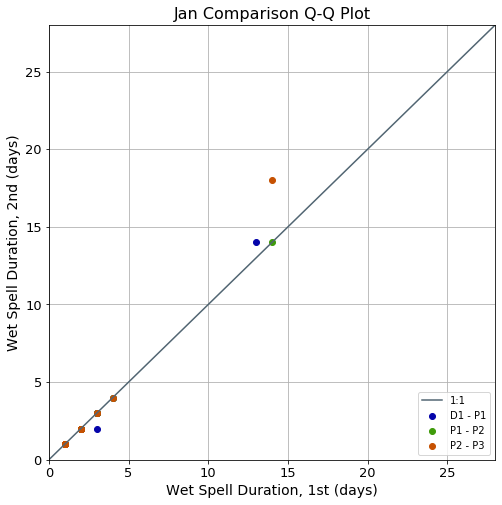

In [65]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanD1Qs, JanP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JanP1Qs, JanP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JanP2Qs, JanP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

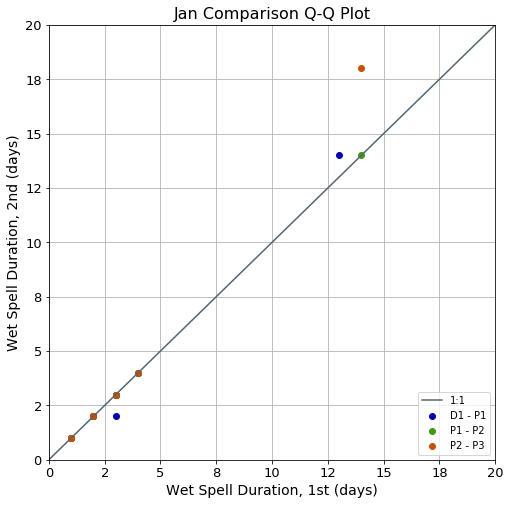

In [66]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanD1Qs, JanP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JanP1Qs, JanP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JanP2Qs, JanP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

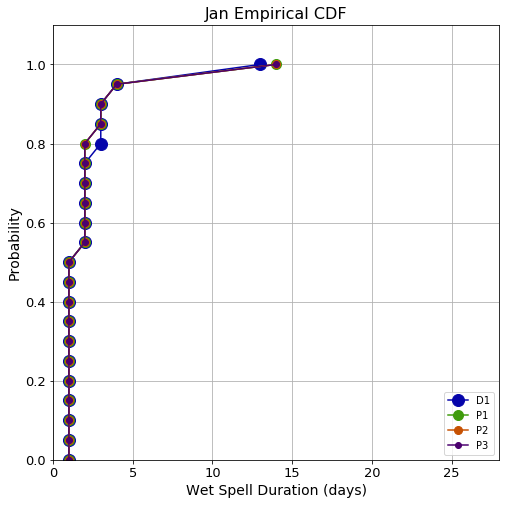

In [67]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JanD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( JanP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( JanP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( JanP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jan Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Feb

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [68]:
FebD1BSCI = sstats.bayes_mvs( np.array( FebD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [69]:
FebD1BSCI

(Mean(statistic=1.9861496978620856, minmax=(1.9840724976481483, 1.988226898076023)),
 Variance(statistic=1.6365478666711952, minmax=(1.632789858564263, 1.6403058747781274)),
 Std_dev(statistic=1.279276305835137, minmax=(1.27780750347798, 1.2807451081922943)))

In [70]:
FebD1BSCI[0][0], FebD1BSCI[0][1][0], FebD1BSCI[0][1][1]

(1.9861496978620856, 1.9840724976481483, 1.988226898076023)

In [71]:
SD1Mean.append( FebD1BSCI[0][0] )
SD1MeanMinCI.append( FebD1BSCI[0][1][0] )
SD1MeanMaxCI.append( FebD1BSCI[0][1][1] )
SD1Var.append( FebD1BSCI[1][0] )
SD1VarMinCI.append( FebD1BSCI[1][1][0] )
SD1VarMaxCI.append( FebD1BSCI[1][1][1] )
SD1Std.append( FebD1BSCI[2][0] )
SD1StdMinCI.append( FebD1BSCI[2][1][0] )
SD1StdMaxCI.append( FebD1BSCI[2][1][1] )

In [72]:
FebP1BSCI = sstats.bayes_mvs( np.array( FebP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [73]:
SP1Mean.append( FebP1BSCI[0][0] )
SP1MeanMinCI.append( FebP1BSCI[0][1][0] )
SP1MeanMaxCI.append( FebP1BSCI[0][1][1] )
SP1Var.append( FebP1BSCI[1][0] )
SP1VarMinCI.append( FebP1BSCI[1][1][0] )
SP1VarMaxCI.append( FebP1BSCI[1][1][1] )
SP1Std.append( FebP1BSCI[2][0] )
SP1StdMinCI.append( FebP1BSCI[2][1][0] )
SP1StdMaxCI.append( FebP1BSCI[2][1][1] )

In [74]:
FebP2BSCI = sstats.bayes_mvs( np.array( FebP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [75]:
SP2Mean.append( FebP2BSCI[0][0] )
SP2MeanMinCI.append( FebP2BSCI[0][1][0] )
SP2MeanMaxCI.append( FebP2BSCI[0][1][1] )
SP2Var.append( FebP2BSCI[1][0] )
SP2VarMinCI.append( FebP2BSCI[1][1][0] )
SP2VarMaxCI.append( FebP2BSCI[1][1][1] )
SP2Std.append( FebP2BSCI[2][0] )
SP2StdMinCI.append( FebP2BSCI[2][1][0] )
SP2StdMaxCI.append( FebP2BSCI[2][1][1] )

In [76]:
FebP3BSCI = sstats.bayes_mvs( np.array( FebP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [77]:
SP3Mean.append( FebP3BSCI[0][0] )
SP3MeanMinCI.append( FebP3BSCI[0][1][0] )
SP3MeanMaxCI.append( FebP3BSCI[0][1][1] )
SP3Var.append( FebP3BSCI[1][0] )
SP3VarMinCI.append( FebP3BSCI[1][1][0] )
SP3VarMaxCI.append( FebP3BSCI[1][1][1] )
SP3Std.append( FebP3BSCI[2][0] )
SP3StdMinCI.append( FebP3BSCI[2][1][0] )
SP3StdMaxCI.append( FebP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [78]:
FebTTD1toP1 = sstats.ttest_ind( np.array( FebD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( FebP1DF["Wet_Count"], dtype=np.int32 ) )

In [79]:
FebTTD1toP1Pval = FebTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % FebTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 4.90874e-56


In [80]:
FebTTP1toP2 = sstats.ttest_ind( np.array( FebP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( FebP2DF["Wet_Count"], dtype=np.int32 ) )

In [81]:
FebTTP1toP2Pval = FebTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % FebTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.7265e-36


In [82]:
FebTTP2toP3 = sstats.ttest_ind( np.array( FebP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( FebP3DF["Wet_Count"], dtype=np.int32 ) )

In [83]:
FebTTP2toP3Pval = FebTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % FebTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 8.5886e-18


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [84]:
FebMWUD1toP1 = sstats.mannwhitneyu( np.array( FebD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( FebP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [85]:
FebMWUD1toP1Pval = FebMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % FebMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 1.09275e-92


In [86]:
FebMWUP1toP2 = sstats.mannwhitneyu( np.array( FebP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( FebP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [87]:
FebMWUP1toP2Pval = FebMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % FebMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 2.25343e-07


In [88]:
FebMWUP2toP3 = sstats.mannwhitneyu( np.array( FebP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( FebP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [89]:
FebMWUP2toP3Pval = FebMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % FebMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.8531e-31


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [90]:
FebKWD1toP1 = sstats.kruskal( np.array( FebD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( FebP1DF["Wet_Count"], dtype=np.int32 ) )

In [91]:
FebKWD1toP1Pval = FebKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % FebKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [92]:
FebKWP1toP2 = sstats.kruskal( np.array( FebP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( FebP2DF["Wet_Count"], dtype=np.int32 ) )

In [93]:
FebKWP1toP2Pval = FebKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % FebKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [94]:
FebKWP2toP3 = sstats.kruskal( np.array( FebP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( FebP3DF["Wet_Count"], dtype=np.int32 ) )

In [95]:
FebKWP2toP3Pval = FebKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % FebKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 0


In [96]:
FebD1DF["Wet_Count"].median(), FebP1DF["Wet_Count"].median(), FebP2DF["Wet_Count"].median(), FebP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [97]:
FebD1Qs = FebD1DF["Wet_Count"].quantile(q=nCompQs)
FebP1Qs = FebP1DF["Wet_Count"].quantile(q=nCompQs)
FebP2Qs = FebP2DF["Wet_Count"].quantile(q=nCompQs)
FebP3Qs = FebP3DF["Wet_Count"].quantile(q=nCompQs)

In [98]:
maxQs = max( FebD1Qs.max(), FebP1Qs.max(), FebP2Qs.max(), FebP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

28.0

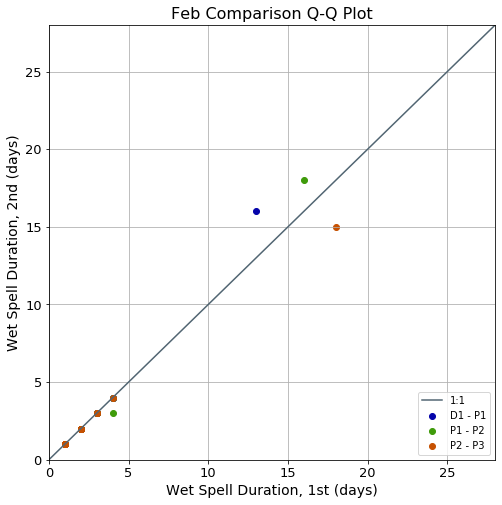

In [99]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebD1Qs, FebP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( FebP1Qs, FebP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( FebP2Qs, FebP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

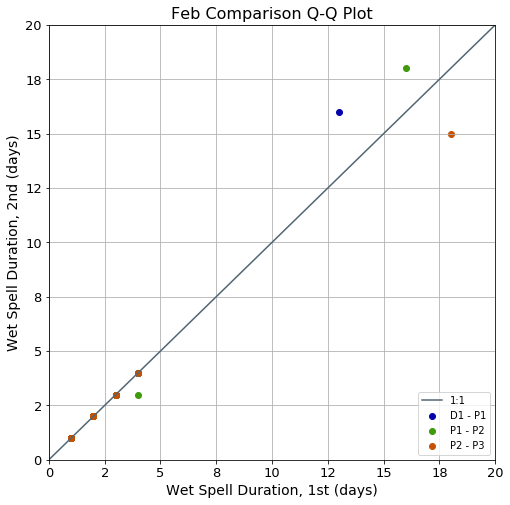

In [100]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebD1Qs, FebP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( FebP1Qs, FebP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( FebP2Qs, FebP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

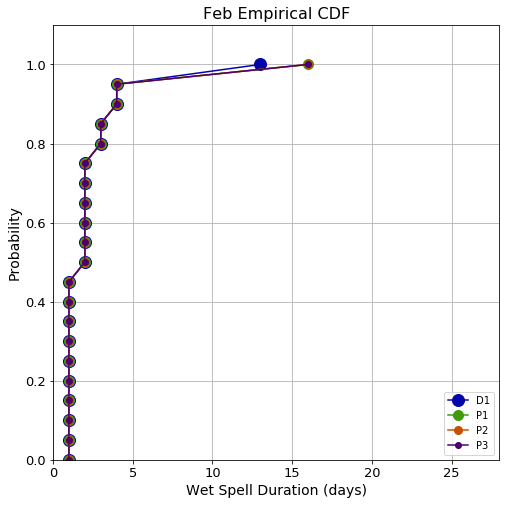

In [101]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( FebD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( FebP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( FebP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( FebP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Feb Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [102]:
MarD1BSCI = sstats.bayes_mvs( np.array( MarD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [103]:
MarD1BSCI

(Mean(statistic=1.8947509726741143, minmax=(1.8927554046506843, 1.8967465406975443)),
 Variance(statistic=1.6172878671565136, minmax=(1.6136988527769573, 1.62087688153607)),
 Std_dev(statistic=1.2717263334367632, minmax=(1.2703152537550768, 1.2731374131184496)))

In [104]:
MarD1BSCI[0][0], MarD1BSCI[0][1][0], MarD1BSCI[0][1][1]

(1.8947509726741143, 1.8927554046506843, 1.8967465406975443)

In [105]:
SD1Mean.append( MarD1BSCI[0][0] )
SD1MeanMinCI.append( MarD1BSCI[0][1][0] )
SD1MeanMaxCI.append( MarD1BSCI[0][1][1] )
SD1Var.append( MarD1BSCI[1][0] )
SD1VarMinCI.append( MarD1BSCI[1][1][0] )
SD1VarMaxCI.append( MarD1BSCI[1][1][1] )
SD1Std.append( MarD1BSCI[2][0] )
SD1StdMinCI.append( MarD1BSCI[2][1][0] )
SD1StdMaxCI.append( MarD1BSCI[2][1][1] )

In [106]:
MarP1BSCI = sstats.bayes_mvs( np.array( MarP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [107]:
SP1Mean.append( MarP1BSCI[0][0] )
SP1MeanMinCI.append( MarP1BSCI[0][1][0] )
SP1MeanMaxCI.append( MarP1BSCI[0][1][1] )
SP1Var.append( MarP1BSCI[1][0] )
SP1VarMinCI.append( MarP1BSCI[1][1][0] )
SP1VarMaxCI.append( MarP1BSCI[1][1][1] )
SP1Std.append( MarP1BSCI[2][0] )
SP1StdMinCI.append( MarP1BSCI[2][1][0] )
SP1StdMaxCI.append( MarP1BSCI[2][1][1] )

In [108]:
MarP2BSCI = sstats.bayes_mvs( np.array( MarP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [109]:
SP2Mean.append( MarP2BSCI[0][0] )
SP2MeanMinCI.append( MarP2BSCI[0][1][0] )
SP2MeanMaxCI.append( MarP2BSCI[0][1][1] )
SP2Var.append( MarP2BSCI[1][0] )
SP2VarMinCI.append( MarP2BSCI[1][1][0] )
SP2VarMaxCI.append( MarP2BSCI[1][1][1] )
SP2Std.append( MarP2BSCI[2][0] )
SP2StdMinCI.append( MarP2BSCI[2][1][0] )
SP2StdMaxCI.append( MarP2BSCI[2][1][1] )

In [110]:
MarP3BSCI = sstats.bayes_mvs( np.array( MarP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [111]:
SP3Mean.append( MarP3BSCI[0][0] )
SP3MeanMinCI.append( MarP3BSCI[0][1][0] )
SP3MeanMaxCI.append( MarP3BSCI[0][1][1] )
SP3Var.append( MarP3BSCI[1][0] )
SP3VarMinCI.append( MarP3BSCI[1][1][0] )
SP3VarMaxCI.append( MarP3BSCI[1][1][1] )
SP3Std.append( MarP3BSCI[2][0] )
SP3StdMinCI.append( MarP3BSCI[2][1][0] )
SP3StdMaxCI.append( MarP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [112]:
MarTTD1toP1 = sstats.ttest_ind( np.array( MarD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MarP1DF["Wet_Count"], dtype=np.int32 ) )

In [113]:
MarTTD1toP1Pval = MarTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % MarTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 9.32985e-23


In [114]:
MarTTP1toP2 = sstats.ttest_ind( np.array( MarP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MarP2DF["Wet_Count"], dtype=np.int32 ) )

In [115]:
MarTTP1toP2Pval = MarTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % MarTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.26639e-52


In [116]:
MarTTP2toP3 = sstats.ttest_ind( np.array( MarP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MarP3DF["Wet_Count"], dtype=np.int32 ) )

In [117]:
MarTTP2toP3Pval = MarTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % MarTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 3.61882e-35


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [118]:
MarMWUD1toP1 = sstats.mannwhitneyu( np.array( MarD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MarP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [119]:
MarMWUD1toP1Pval = MarMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % MarMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 3.67988e-37


In [120]:
MarMWUP1toP2 = sstats.mannwhitneyu( np.array( MarP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MarP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [121]:
MarMWUP1toP2Pval = MarMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % MarMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 8.05976e-30


In [122]:
MarMWUP2toP3 = sstats.mannwhitneyu( np.array( MarP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MarP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [123]:
MarMWUP2toP3Pval = MarMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % MarMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 5.35724e-05


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [124]:
MarKWD1toP1 = sstats.kruskal( np.array( MarD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MarP1DF["Wet_Count"], dtype=np.int32 ) )

In [125]:
MarKWD1toP1Pval = MarKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % MarKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [126]:
MarKWP1toP2 = sstats.kruskal( np.array( MarP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MarP2DF["Wet_Count"], dtype=np.int32 ) )

In [127]:
MarKWP1toP2Pval = MarKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % MarKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [128]:
MarKWP2toP3 = sstats.kruskal( np.array( MarP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MarP3DF["Wet_Count"], dtype=np.int32 ) )

In [129]:
MarKWP2toP3Pval = MarKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % MarKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [130]:
MarD1DF["Wet_Count"].median(), MarP1DF["Wet_Count"].median(), MarP2DF["Wet_Count"].median(), MarP3DF["Wet_Count"].median()

(1.0, 2.0, 1.0, 1.0)

#### Plots

In [131]:
MarD1Qs = MarD1DF["Wet_Count"].quantile(q=nCompQs)
MarP1Qs = MarP1DF["Wet_Count"].quantile(q=nCompQs)
MarP2Qs = MarP2DF["Wet_Count"].quantile(q=nCompQs)
MarP3Qs = MarP3DF["Wet_Count"].quantile(q=nCompQs)

In [132]:
maxQs = max( MarD1Qs.max(), MarP1Qs.max(), MarP2Qs.max(), MarP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

30.0

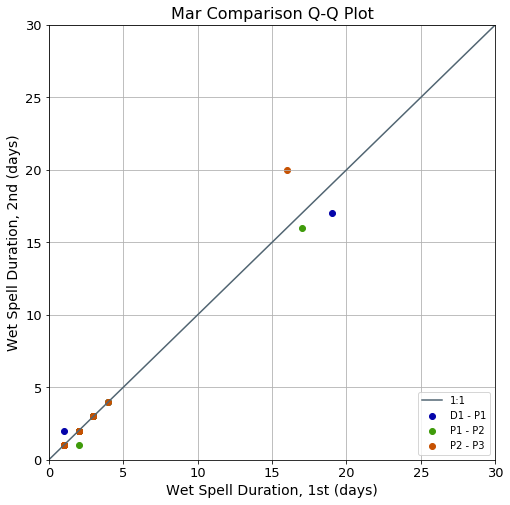

In [133]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarD1Qs, MarP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MarP1Qs, MarP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MarP2Qs, MarP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

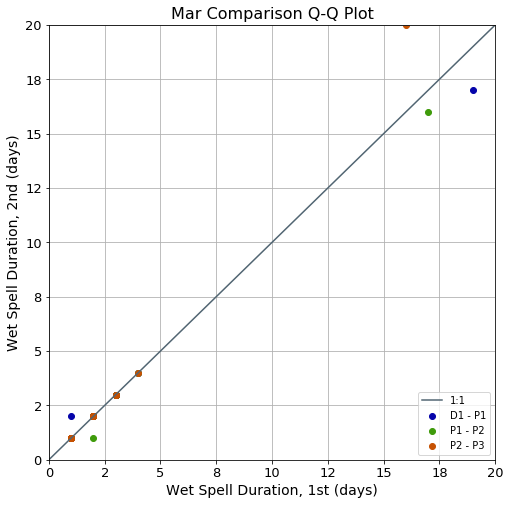

In [134]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarD1Qs, MarP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MarP1Qs, MarP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MarP2Qs, MarP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

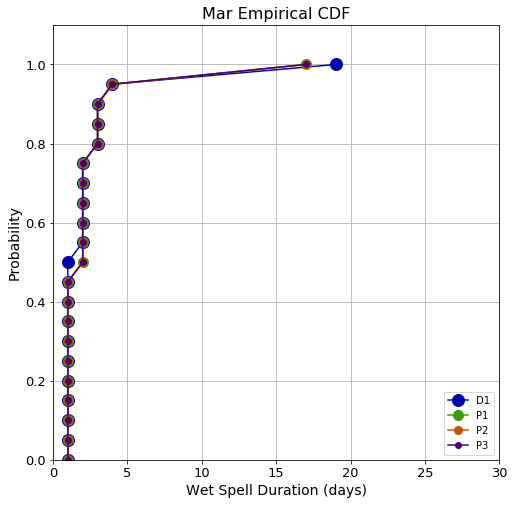

In [135]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MarD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( MarP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( MarP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( MarP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Mar Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [136]:
AprD1BSCI = sstats.bayes_mvs( np.array( AprD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [137]:
AprD1BSCI

(Mean(statistic=2.3018736515992684, minmax=(2.299244981877206, 2.3045023213213307)),
 Variance(statistic=3.190342720712182, minmax=(3.1837026960816686, 3.1969827453426958)),
 Std_dev(statistic=1.7861530507524215, minmax=(1.7842943005664516, 1.7880118009383914)))

In [138]:
AprD1BSCI[0][0], AprD1BSCI[0][1][0], AprD1BSCI[0][1][1]

(2.3018736515992684, 2.299244981877206, 2.3045023213213307)

In [139]:
SD1Mean.append( AprD1BSCI[0][0] )
SD1MeanMinCI.append( AprD1BSCI[0][1][0] )
SD1MeanMaxCI.append( AprD1BSCI[0][1][1] )
SD1Var.append( AprD1BSCI[1][0] )
SD1VarMinCI.append( AprD1BSCI[1][1][0] )
SD1VarMaxCI.append( AprD1BSCI[1][1][1] )
SD1Std.append( AprD1BSCI[2][0] )
SD1StdMinCI.append( AprD1BSCI[2][1][0] )
SD1StdMaxCI.append( AprD1BSCI[2][1][1] )

In [140]:
AprP1BSCI = sstats.bayes_mvs( np.array( AprP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [141]:
SP1Mean.append( AprP1BSCI[0][0] )
SP1MeanMinCI.append( AprP1BSCI[0][1][0] )
SP1MeanMaxCI.append( AprP1BSCI[0][1][1] )
SP1Var.append( AprP1BSCI[1][0] )
SP1VarMinCI.append( AprP1BSCI[1][1][0] )
SP1VarMaxCI.append( AprP1BSCI[1][1][1] )
SP1Std.append( AprP1BSCI[2][0] )
SP1StdMinCI.append( AprP1BSCI[2][1][0] )
SP1StdMaxCI.append( AprP1BSCI[2][1][1] )

In [142]:
AprP2BSCI = sstats.bayes_mvs( np.array( AprP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [143]:
SP2Mean.append( AprP2BSCI[0][0] )
SP2MeanMinCI.append( AprP2BSCI[0][1][0] )
SP2MeanMaxCI.append( AprP2BSCI[0][1][1] )
SP2Var.append( AprP2BSCI[1][0] )
SP2VarMinCI.append( AprP2BSCI[1][1][0] )
SP2VarMaxCI.append( AprP2BSCI[1][1][1] )
SP2Std.append( AprP2BSCI[2][0] )
SP2StdMinCI.append( AprP2BSCI[2][1][0] )
SP2StdMaxCI.append( AprP2BSCI[2][1][1] )

In [144]:
AprP3BSCI = sstats.bayes_mvs( np.array( AprP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [145]:
SP3Mean.append( AprP3BSCI[0][0] )
SP3MeanMinCI.append( AprP3BSCI[0][1][0] )
SP3MeanMaxCI.append( AprP3BSCI[0][1][1] )
SP3Var.append( AprP3BSCI[1][0] )
SP3VarMinCI.append( AprP3BSCI[1][1][0] )
SP3VarMaxCI.append( AprP3BSCI[1][1][1] )
SP3Std.append( AprP3BSCI[2][0] )
SP3StdMinCI.append( AprP3BSCI[2][1][0] )
SP3StdMaxCI.append( AprP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [146]:
AprTTD1toP1 = sstats.ttest_ind( np.array( AprD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AprP1DF["Wet_Count"], dtype=np.int32 ) )

In [147]:
AprTTD1toP1Pval = AprTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % AprTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 1.60205e-103


In [148]:
AprTTP1toP2 = sstats.ttest_ind( np.array( AprP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AprP2DF["Wet_Count"], dtype=np.int32 ) )

In [149]:
AprTTP1toP2Pval = AprTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % AprTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.5416e-25


In [150]:
AprTTP2toP3 = sstats.ttest_ind( np.array( AprP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AprP3DF["Wet_Count"], dtype=np.int32 ) )

In [151]:
AprTTP2toP3Pval = AprTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % AprTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 3.79126e-25


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [152]:
AprMWUD1toP1 = sstats.mannwhitneyu( np.array( AprD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AprP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [153]:
AprMWUD1toP1Pval = AprMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % AprMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 7.39917e-49


In [154]:
AprMWUP1toP2 = sstats.mannwhitneyu( np.array( AprP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AprP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [155]:
AprMWUP1toP2Pval = AprMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % AprMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 1.87611e-05


In [156]:
AprMWUP2toP3 = sstats.mannwhitneyu( np.array( AprP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AprP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [157]:
AprMWUP2toP3Pval = AprMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % AprMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.55706e-12


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [158]:
AprKWD1toP1 = sstats.kruskal( np.array( AprD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AprP1DF["Wet_Count"], dtype=np.int32 ) )

In [159]:
AprKWD1toP1Pval = AprKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % AprKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [160]:
AprKWP1toP2 = sstats.kruskal( np.array( AprP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AprP2DF["Wet_Count"], dtype=np.int32 ) )

In [161]:
AprKWP1toP2Pval = AprKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % AprKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [162]:
AprKWP2toP3 = sstats.kruskal( np.array( AprP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AprP3DF["Wet_Count"], dtype=np.int32 ) )

In [163]:
AprKWP2toP3Pval = AprKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % AprKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [164]:
AprD1DF["Wet_Count"].median(), AprP1DF["Wet_Count"].median(), AprP2DF["Wet_Count"].median(), AprP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [165]:
AprD1Qs = AprD1DF["Wet_Count"].quantile(q=nCompQs)
AprP1Qs = AprP1DF["Wet_Count"].quantile(q=nCompQs)
AprP2Qs = AprP2DF["Wet_Count"].quantile(q=nCompQs)
AprP3Qs = AprP3DF["Wet_Count"].quantile(q=nCompQs)

In [166]:
maxQs = max( AprD1Qs.max(), AprP1Qs.max(), AprP2Qs.max(), AprP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

37.0

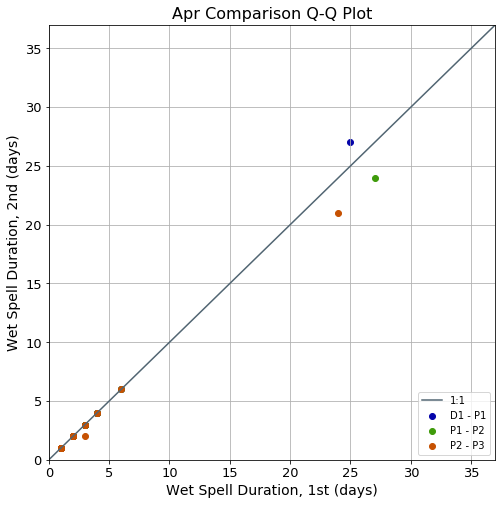

In [167]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprD1Qs, AprP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AprP1Qs, AprP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AprP2Qs, AprP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

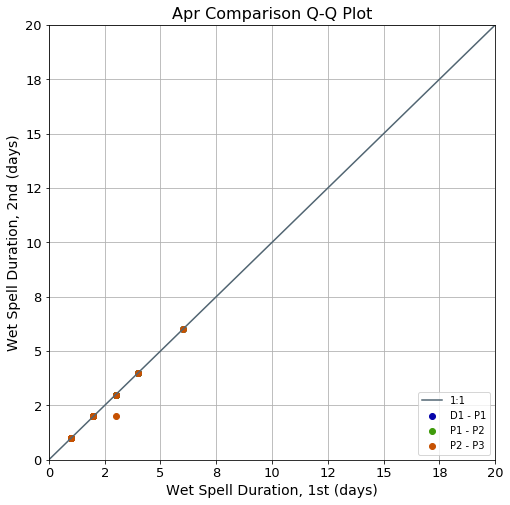

In [168]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprD1Qs, AprP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AprP1Qs, AprP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AprP2Qs, AprP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

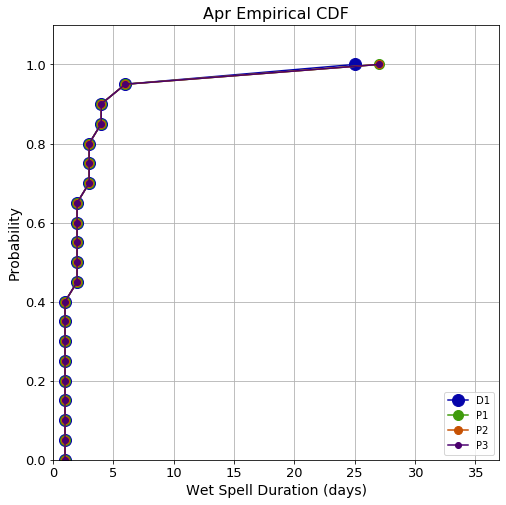

In [169]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AprD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( AprP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( AprP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( AprP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Apr Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [170]:
MayD1BSCI = sstats.bayes_mvs( np.array( MayD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [171]:
MayD1BSCI

(Mean(statistic=2.692112289915609, minmax=(2.689105429137751, 2.695119150693467)),
 Variance(statistic=4.912168003527633, minmax=(4.90274336019118, 4.921592646864085)),
 Std_dev(statistic=2.2163411297739417, minmax=(2.2142149581278345, 2.218467301420049)))

In [172]:
MayD1BSCI[0][0], MayD1BSCI[0][1][0], MayD1BSCI[0][1][1]

(2.692112289915609, 2.689105429137751, 2.695119150693467)

In [173]:
SD1Mean.append( MayD1BSCI[0][0] )
SD1MeanMinCI.append( MayD1BSCI[0][1][0] )
SD1MeanMaxCI.append( MayD1BSCI[0][1][1] )
SD1Var.append( MayD1BSCI[1][0] )
SD1VarMinCI.append( MayD1BSCI[1][1][0] )
SD1VarMaxCI.append( MayD1BSCI[1][1][1] )
SD1Std.append( MayD1BSCI[2][0] )
SD1StdMinCI.append( MayD1BSCI[2][1][0] )
SD1StdMaxCI.append( MayD1BSCI[2][1][1] )

In [174]:
MayP1BSCI = sstats.bayes_mvs( np.array( MayP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [175]:
SP1Mean.append( MayP1BSCI[0][0] )
SP1MeanMinCI.append( MayP1BSCI[0][1][0] )
SP1MeanMaxCI.append( MayP1BSCI[0][1][1] )
SP1Var.append( MayP1BSCI[1][0] )
SP1VarMinCI.append( MayP1BSCI[1][1][0] )
SP1VarMaxCI.append( MayP1BSCI[1][1][1] )
SP1Std.append( MayP1BSCI[2][0] )
SP1StdMinCI.append( MayP1BSCI[2][1][0] )
SP1StdMaxCI.append( MayP1BSCI[2][1][1] )

In [176]:
MayP2BSCI = sstats.bayes_mvs( np.array( MayP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [177]:
SP2Mean.append( MayP2BSCI[0][0] )
SP2MeanMinCI.append( MayP2BSCI[0][1][0] )
SP2MeanMaxCI.append( MayP2BSCI[0][1][1] )
SP2Var.append( MayP2BSCI[1][0] )
SP2VarMinCI.append( MayP2BSCI[1][1][0] )
SP2VarMaxCI.append( MayP2BSCI[1][1][1] )
SP2Std.append( MayP2BSCI[2][0] )
SP2StdMinCI.append( MayP2BSCI[2][1][0] )
SP2StdMaxCI.append( MayP2BSCI[2][1][1] )

In [178]:
MayP3BSCI = sstats.bayes_mvs( np.array( MayP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [179]:
SP3Mean.append( MayP3BSCI[0][0] )
SP3MeanMinCI.append( MayP3BSCI[0][1][0] )
SP3MeanMaxCI.append( MayP3BSCI[0][1][1] )
SP3Var.append( MayP3BSCI[1][0] )
SP3VarMinCI.append( MayP3BSCI[1][1][0] )
SP3VarMaxCI.append( MayP3BSCI[1][1][1] )
SP3Std.append( MayP3BSCI[2][0] )
SP3StdMinCI.append( MayP3BSCI[2][1][0] )
SP3StdMaxCI.append( MayP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [180]:
MayTTD1toP1 = sstats.ttest_ind( np.array( MayD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MayP1DF["Wet_Count"], dtype=np.int32 ) )

In [181]:
MayTTD1toP1Pval = MayTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % MayTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 2.96913e-27


In [182]:
MayTTP1toP2 = sstats.ttest_ind( np.array( MayP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MayP2DF["Wet_Count"], dtype=np.int32 ) )

In [183]:
MayTTP1toP2Pval = MayTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % MayTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 0.749034


In [184]:
MayTTP2toP3 = sstats.ttest_ind( np.array( MayP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( MayP3DF["Wet_Count"], dtype=np.int32 ) )

In [185]:
MayTTP2toP3Pval = MayTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % MayTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 3.12106e-73


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [186]:
MayMWUD1toP1 = sstats.mannwhitneyu( np.array( MayD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MayP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [187]:
MayMWUD1toP1Pval = MayMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % MayMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 1.70499e-94


In [188]:
MayMWUP1toP2 = sstats.mannwhitneyu( np.array( MayP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MayP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [189]:
MayMWUP1toP2Pval = MayMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % MayMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.00961385


In [190]:
MayMWUP2toP3 = sstats.mannwhitneyu( np.array( MayP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( MayP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [191]:
MayMWUP2toP3Pval = MayMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % MayMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.73159e-73


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [192]:
MayKWD1toP1 = sstats.kruskal( np.array( MayD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MayP1DF["Wet_Count"], dtype=np.int32 ) )

In [193]:
MayKWD1toP1Pval = MayKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % MayKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [194]:
MayKWP1toP2 = sstats.kruskal( np.array( MayP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MayP2DF["Wet_Count"], dtype=np.int32 ) )

In [195]:
MayKWP1toP2Pval = MayKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % MayKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [196]:
MayKWP2toP3 = sstats.kruskal( np.array( MayP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( MayP3DF["Wet_Count"], dtype=np.int32 ) )

In [197]:
MayKWP2toP3Pval = MayKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % MayKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [198]:
MayD1DF["Wet_Count"].median(), MayP1DF["Wet_Count"].median(), MayP2DF["Wet_Count"].median(), MayP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [199]:
MayD1Qs = MayD1DF["Wet_Count"].quantile(q=nCompQs)
MayP1Qs = MayP1DF["Wet_Count"].quantile(q=nCompQs)
MayP2Qs = MayP2DF["Wet_Count"].quantile(q=nCompQs)
MayP3Qs = MayP3DF["Wet_Count"].quantile(q=nCompQs)

In [200]:
maxQs = max( MayD1Qs.max(), MayP1Qs.max(), MayP2Qs.max(), MayP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

54.0

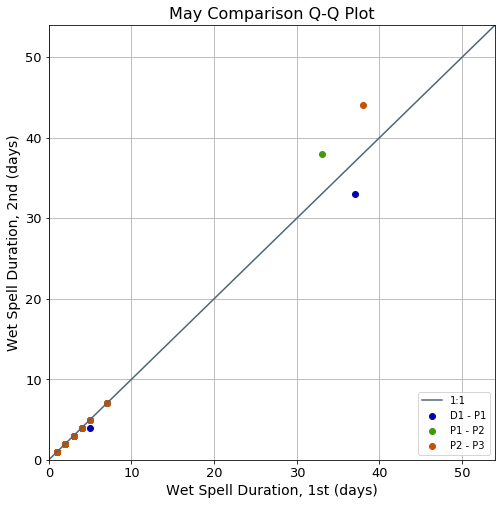

In [201]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayD1Qs, MayP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MayP1Qs, MayP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MayP2Qs, MayP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

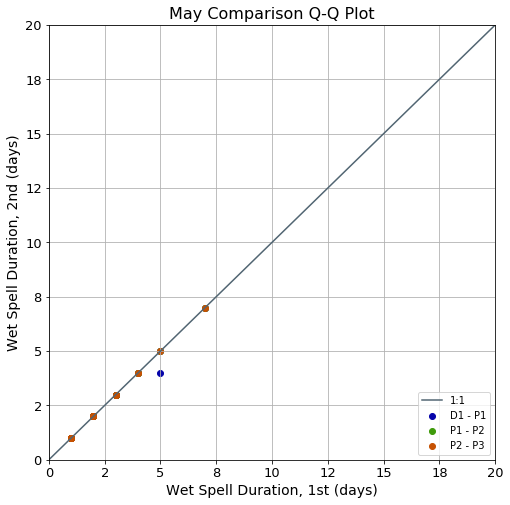

In [202]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayD1Qs, MayP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( MayP1Qs, MayP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( MayP2Qs, MayP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

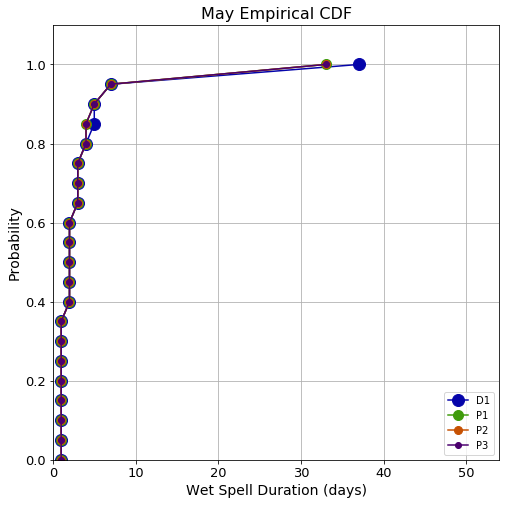

In [203]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MayD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( MayP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( MayP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( MayP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('May Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [204]:
JunD1BSCI = sstats.bayes_mvs( np.array( JunD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [205]:
JunD1BSCI

(Mean(statistic=2.915002110540678, minmax=(2.911320353634605, 2.9186838674467506)),
 Variance(statistic=6.207742199489661, minmax=(6.194769303253671, 6.220715095725651)),
 Std_dev(statistic=2.4915341056244165, minmax=(2.488930710349452, 2.494137500899381)))

In [206]:
JunD1BSCI[0][0], JunD1BSCI[0][1][0], JunD1BSCI[0][1][1]

(2.915002110540678, 2.911320353634605, 2.9186838674467506)

In [207]:
SD1Mean.append( JunD1BSCI[0][0] )
SD1MeanMinCI.append( JunD1BSCI[0][1][0] )
SD1MeanMaxCI.append( JunD1BSCI[0][1][1] )
SD1Var.append( JunD1BSCI[1][0] )
SD1VarMinCI.append( JunD1BSCI[1][1][0] )
SD1VarMaxCI.append( JunD1BSCI[1][1][1] )
SD1Std.append( JunD1BSCI[2][0] )
SD1StdMinCI.append( JunD1BSCI[2][1][0] )
SD1StdMaxCI.append( JunD1BSCI[2][1][1] )

In [208]:
JunP1BSCI = sstats.bayes_mvs( np.array( JunP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [209]:
SP1Mean.append( JunP1BSCI[0][0] )
SP1MeanMinCI.append( JunP1BSCI[0][1][0] )
SP1MeanMaxCI.append( JunP1BSCI[0][1][1] )
SP1Var.append( JunP1BSCI[1][0] )
SP1VarMinCI.append( JunP1BSCI[1][1][0] )
SP1VarMaxCI.append( JunP1BSCI[1][1][1] )
SP1Std.append( JunP1BSCI[2][0] )
SP1StdMinCI.append( JunP1BSCI[2][1][0] )
SP1StdMaxCI.append( JunP1BSCI[2][1][1] )

In [210]:
JunP2BSCI = sstats.bayes_mvs( np.array( JunP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [211]:
SP2Mean.append( JunP2BSCI[0][0] )
SP2MeanMinCI.append( JunP2BSCI[0][1][0] )
SP2MeanMaxCI.append( JunP2BSCI[0][1][1] )
SP2Var.append( JunP2BSCI[1][0] )
SP2VarMinCI.append( JunP2BSCI[1][1][0] )
SP2VarMaxCI.append( JunP2BSCI[1][1][1] )
SP2Std.append( JunP2BSCI[2][0] )
SP2StdMinCI.append( JunP2BSCI[2][1][0] )
SP2StdMaxCI.append( JunP2BSCI[2][1][1] )

In [212]:
JunP3BSCI = sstats.bayes_mvs( np.array( JunP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [213]:
SP3Mean.append( JunP3BSCI[0][0] )
SP3MeanMinCI.append( JunP3BSCI[0][1][0] )
SP3MeanMaxCI.append( JunP3BSCI[0][1][1] )
SP3Var.append( JunP3BSCI[1][0] )
SP3VarMinCI.append( JunP3BSCI[1][1][0] )
SP3VarMaxCI.append( JunP3BSCI[1][1][1] )
SP3Std.append( JunP3BSCI[2][0] )
SP3StdMinCI.append( JunP3BSCI[2][1][0] )
SP3StdMaxCI.append( JunP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [214]:
JunTTD1toP1 = sstats.ttest_ind( np.array( JunD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JunP1DF["Wet_Count"], dtype=np.int32 ) )

In [215]:
JunTTD1toP1Pval = JunTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % JunTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 4.57433e-32


In [216]:
JunTTP1toP2 = sstats.ttest_ind( np.array( JunP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JunP2DF["Wet_Count"], dtype=np.int32 ) )

In [217]:
JunTTP1toP2Pval = JunTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % JunTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 0.319368


In [218]:
JunTTP2toP3 = sstats.ttest_ind( np.array( JunP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JunP3DF["Wet_Count"], dtype=np.int32 ) )

In [219]:
JunTTP2toP3Pval = JunTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % JunTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 2.52704e-08


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [220]:
JunMWUD1toP1 = sstats.mannwhitneyu( np.array( JunD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JunP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [221]:
JunMWUD1toP1Pval = JunMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % JunMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0.000223358


In [222]:
JunMWUP1toP2 = sstats.mannwhitneyu( np.array( JunP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JunP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [223]:
JunMWUP1toP2Pval = JunMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % JunMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.000563747


In [224]:
JunMWUP2toP3 = sstats.mannwhitneyu( np.array( JunP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JunP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [225]:
JunMWUP2toP3Pval = JunMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % JunMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 1.7936e-102


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [226]:
JunKWD1toP1 = sstats.kruskal( np.array( JunD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JunP1DF["Wet_Count"], dtype=np.int32 ) )

In [227]:
JunKWD1toP1Pval = JunKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % JunKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [228]:
JunKWP1toP2 = sstats.kruskal( np.array( JunP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JunP2DF["Wet_Count"], dtype=np.int32 ) )

In [229]:
JunKWP1toP2Pval = JunKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % JunKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [230]:
JunKWP2toP3 = sstats.kruskal( np.array( JunP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JunP3DF["Wet_Count"], dtype=np.int32 ) )

In [231]:
JunKWP2toP3Pval = JunKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % JunKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [232]:
JunD1DF["Wet_Count"].median(), JunP1DF["Wet_Count"].median(), JunP2DF["Wet_Count"].median(), JunP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [233]:
JunD1Qs = JunD1DF["Wet_Count"].quantile(q=nCompQs)
JunP1Qs = JunP1DF["Wet_Count"].quantile(q=nCompQs)
JunP2Qs = JunP2DF["Wet_Count"].quantile(q=nCompQs)
JunP3Qs = JunP3DF["Wet_Count"].quantile(q=nCompQs)

In [234]:
maxQs = max( JunD1Qs.max(), JunP1Qs.max(), JunP2Qs.max(), JunP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

62.0

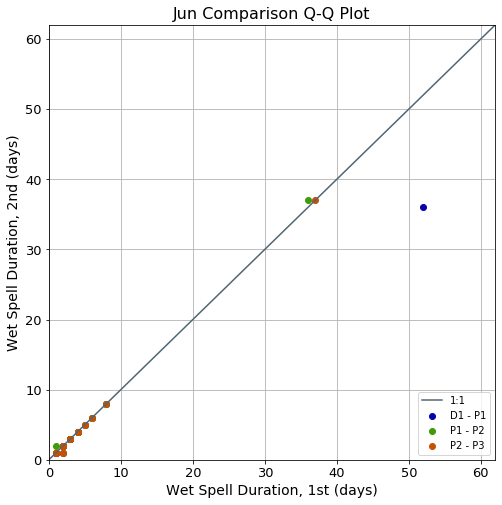

In [235]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunD1Qs, JunP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JunP1Qs, JunP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JunP2Qs, JunP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

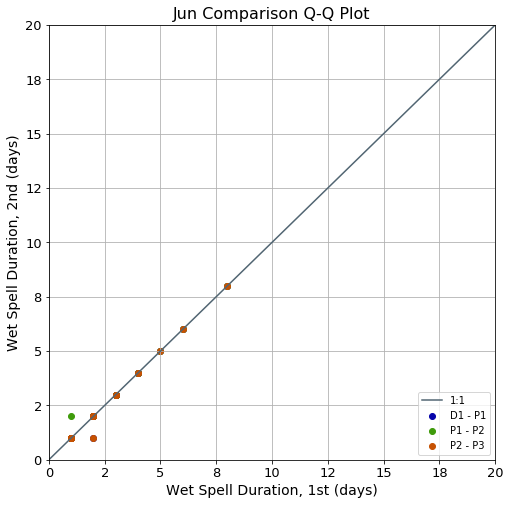

In [236]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunD1Qs, JunP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JunP1Qs, JunP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JunP2Qs, JunP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

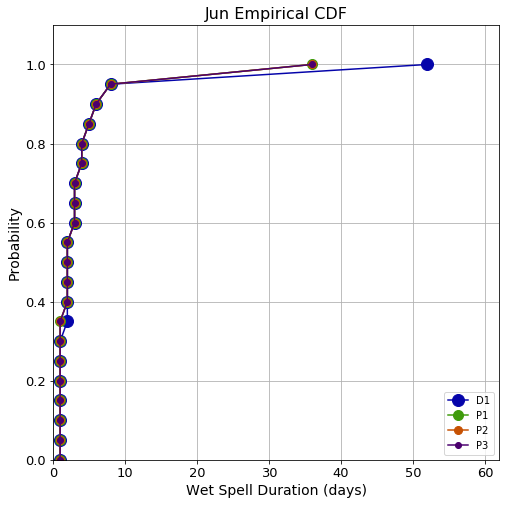

In [237]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JunD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( JunP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( JunP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( JunP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jun Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [238]:
JulD1BSCI = sstats.bayes_mvs( np.array( JulD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [239]:
JulD1BSCI

(Mean(statistic=2.626201271605682, minmax=(2.6225089501389047, 2.629893593072459)),
 Variance(statistic=5.271193762447261, minmax=(5.259205148004612, 5.28318237688991)),
 Std_dev(statistic=2.2959080474721243, minmax=(2.2932971819246455, 2.298518913019603)))

In [240]:
JulD1BSCI[0][0], JulD1BSCI[0][1][0], JulD1BSCI[0][1][1]

(2.626201271605682, 2.6225089501389047, 2.629893593072459)

In [241]:
SD1Mean.append( JulD1BSCI[0][0] )
SD1MeanMinCI.append( JulD1BSCI[0][1][0] )
SD1MeanMaxCI.append( JulD1BSCI[0][1][1] )
SD1Var.append( JulD1BSCI[1][0] )
SD1VarMinCI.append( JulD1BSCI[1][1][0] )
SD1VarMaxCI.append( JulD1BSCI[1][1][1] )
SD1Std.append( JulD1BSCI[2][0] )
SD1StdMinCI.append( JulD1BSCI[2][1][0] )
SD1StdMaxCI.append( JulD1BSCI[2][1][1] )

In [242]:
JulP1BSCI = sstats.bayes_mvs( np.array( JulP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [243]:
SP1Mean.append( JulP1BSCI[0][0] )
SP1MeanMinCI.append( JulP1BSCI[0][1][0] )
SP1MeanMaxCI.append( JulP1BSCI[0][1][1] )
SP1Var.append( JulP1BSCI[1][0] )
SP1VarMinCI.append( JulP1BSCI[1][1][0] )
SP1VarMaxCI.append( JulP1BSCI[1][1][1] )
SP1Std.append( JulP1BSCI[2][0] )
SP1StdMinCI.append( JulP1BSCI[2][1][0] )
SP1StdMaxCI.append( JulP1BSCI[2][1][1] )

In [244]:
JulP2BSCI = sstats.bayes_mvs( np.array( JulP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [245]:
SP2Mean.append( JulP2BSCI[0][0] )
SP2MeanMinCI.append( JulP2BSCI[0][1][0] )
SP2MeanMaxCI.append( JulP2BSCI[0][1][1] )
SP2Var.append( JulP2BSCI[1][0] )
SP2VarMinCI.append( JulP2BSCI[1][1][0] )
SP2VarMaxCI.append( JulP2BSCI[1][1][1] )
SP2Std.append( JulP2BSCI[2][0] )
SP2StdMinCI.append( JulP2BSCI[2][1][0] )
SP2StdMaxCI.append( JulP2BSCI[2][1][1] )

In [246]:
JulP3BSCI = sstats.bayes_mvs( np.array( JulP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [247]:
SP3Mean.append( JulP3BSCI[0][0] )
SP3MeanMinCI.append( JulP3BSCI[0][1][0] )
SP3MeanMaxCI.append( JulP3BSCI[0][1][1] )
SP3Var.append( JulP3BSCI[1][0] )
SP3VarMinCI.append( JulP3BSCI[1][1][0] )
SP3VarMaxCI.append( JulP3BSCI[1][1][1] )
SP3Std.append( JulP3BSCI[2][0] )
SP3StdMinCI.append( JulP3BSCI[2][1][0] )
SP3StdMaxCI.append( JulP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [248]:
JulTTD1toP1 = sstats.ttest_ind( np.array( JulD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JulP1DF["Wet_Count"], dtype=np.int32 ) )

In [249]:
JulTTD1toP1Pval = JulTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % JulTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 0.059207


In [250]:
JulTTP1toP2 = sstats.ttest_ind( np.array( JulP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JulP2DF["Wet_Count"], dtype=np.int32 ) )

In [251]:
JulTTP1toP2Pval = JulTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % JulTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 0.0345178


In [252]:
JulTTP2toP3 = sstats.ttest_ind( np.array( JulP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( JulP3DF["Wet_Count"], dtype=np.int32 ) )

In [253]:
JulTTP2toP3Pval = JulTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % JulTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 0.0240644


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [254]:
JulMWUD1toP1 = sstats.mannwhitneyu( np.array( JulD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JulP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [255]:
JulMWUD1toP1Pval = JulMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % JulMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 0.0631129


In [256]:
JulMWUP1toP2 = sstats.mannwhitneyu( np.array( JulP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JulP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [257]:
JulMWUP1toP2Pval = JulMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % JulMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 2.00751e-05


In [258]:
JulMWUP2toP3 = sstats.mannwhitneyu( np.array( JulP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( JulP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [259]:
JulMWUP2toP3Pval = JulMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % JulMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 6.43155e-34


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [260]:
JulKWD1toP1 = sstats.kruskal( np.array( JulD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JulP1DF["Wet_Count"], dtype=np.int32 ) )

In [261]:
JulKWD1toP1Pval = JulKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % JulKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [262]:
JulKWP1toP2 = sstats.kruskal( np.array( JulP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JulP2DF["Wet_Count"], dtype=np.int32 ) )

In [263]:
JulKWP1toP2Pval = JulKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % JulKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [264]:
JulKWP2toP3 = sstats.kruskal( np.array( JulP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( JulP3DF["Wet_Count"], dtype=np.int32 ) )

In [265]:
JulKWP2toP3Pval = JulKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % JulKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [266]:
JulD1DF["Wet_Count"].median(), JulP1DF["Wet_Count"].median(), JulP2DF["Wet_Count"].median(), JulP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [267]:
JulD1Qs = JulD1DF["Wet_Count"].quantile(q=nCompQs)
JulP1Qs = JulP1DF["Wet_Count"].quantile(q=nCompQs)
JulP2Qs = JulP2DF["Wet_Count"].quantile(q=nCompQs)
JulP3Qs = JulP3DF["Wet_Count"].quantile(q=nCompQs)

In [268]:
maxQs = max( JulD1Qs.max(), JulP1Qs.max(), JulP2Qs.max(), JulP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

63.0

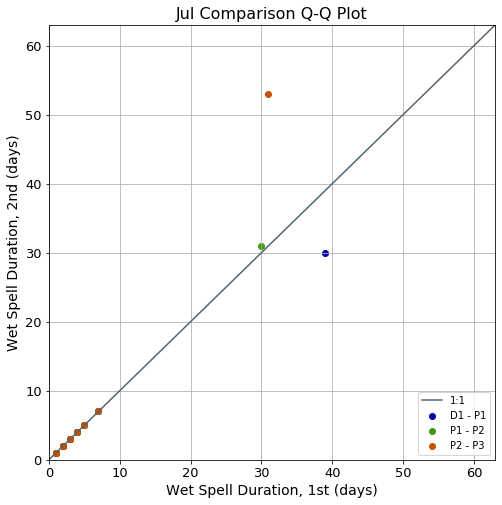

In [269]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulD1Qs, JulP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JulP1Qs, JulP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JulP2Qs, JulP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

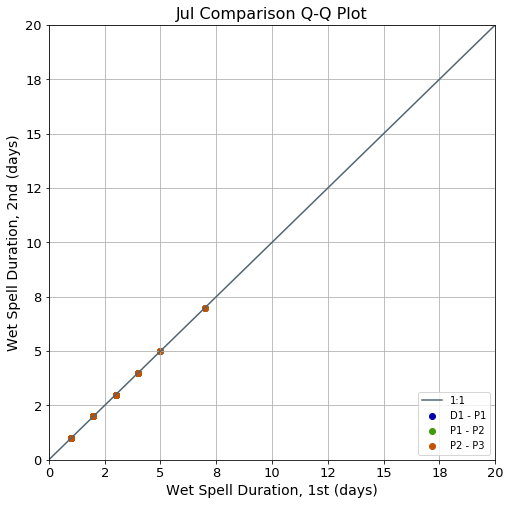

In [270]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulD1Qs, JulP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( JulP1Qs, JulP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( JulP2Qs, JulP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

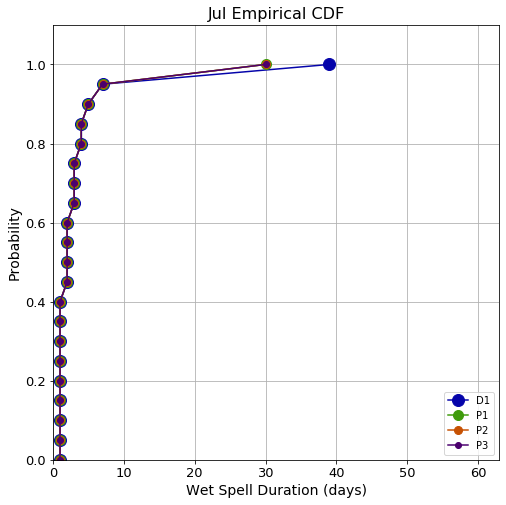

In [271]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JulD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( JulP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( JulP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( JulP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jul Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [272]:
AugD1BSCI = sstats.bayes_mvs( np.array( AugD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [273]:
AugD1BSCI

(Mean(statistic=2.6213250852834133, minmax=(2.6178334368164142, 2.6248167337504125)),
 Variance(statistic=4.89803262394446, minmax=(4.88710422985346, 4.908961018035461)),
 Std_dev(statistic=2.213149932549636, minmax=(2.2106809642411016, 2.215618900858171)))

In [274]:
AugD1BSCI[0][0], AugD1BSCI[0][1][0], AugD1BSCI[0][1][1]

(2.6213250852834133, 2.6178334368164142, 2.6248167337504125)

In [275]:
SD1Mean.append( AugD1BSCI[0][0] )
SD1MeanMinCI.append( AugD1BSCI[0][1][0] )
SD1MeanMaxCI.append( AugD1BSCI[0][1][1] )
SD1Var.append( AugD1BSCI[1][0] )
SD1VarMinCI.append( AugD1BSCI[1][1][0] )
SD1VarMaxCI.append( AugD1BSCI[1][1][1] )
SD1Std.append( AugD1BSCI[2][0] )
SD1StdMinCI.append( AugD1BSCI[2][1][0] )
SD1StdMaxCI.append( AugD1BSCI[2][1][1] )

In [276]:
AugP1BSCI = sstats.bayes_mvs( np.array( AugP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [277]:
SP1Mean.append( AugP1BSCI[0][0] )
SP1MeanMinCI.append( AugP1BSCI[0][1][0] )
SP1MeanMaxCI.append( AugP1BSCI[0][1][1] )
SP1Var.append( AugP1BSCI[1][0] )
SP1VarMinCI.append( AugP1BSCI[1][1][0] )
SP1VarMaxCI.append( AugP1BSCI[1][1][1] )
SP1Std.append( AugP1BSCI[2][0] )
SP1StdMinCI.append( AugP1BSCI[2][1][0] )
SP1StdMaxCI.append( AugP1BSCI[2][1][1] )

In [278]:
AugP2BSCI = sstats.bayes_mvs( np.array( AugP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [279]:
SP2Mean.append( AugP2BSCI[0][0] )
SP2MeanMinCI.append( AugP2BSCI[0][1][0] )
SP2MeanMaxCI.append( AugP2BSCI[0][1][1] )
SP2Var.append( AugP2BSCI[1][0] )
SP2VarMinCI.append( AugP2BSCI[1][1][0] )
SP2VarMaxCI.append( AugP2BSCI[1][1][1] )
SP2Std.append( AugP2BSCI[2][0] )
SP2StdMinCI.append( AugP2BSCI[2][1][0] )
SP2StdMaxCI.append( AugP2BSCI[2][1][1] )

In [280]:
AugP3BSCI = sstats.bayes_mvs( np.array( AugP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [281]:
SP3Mean.append( AugP3BSCI[0][0] )
SP3MeanMinCI.append( AugP3BSCI[0][1][0] )
SP3MeanMaxCI.append( AugP3BSCI[0][1][1] )
SP3Var.append( AugP3BSCI[1][0] )
SP3VarMinCI.append( AugP3BSCI[1][1][0] )
SP3VarMaxCI.append( AugP3BSCI[1][1][1] )
SP3Std.append( AugP3BSCI[2][0] )
SP3StdMinCI.append( AugP3BSCI[2][1][0] )
SP3StdMaxCI.append( AugP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [282]:
AugTTD1toP1 = sstats.ttest_ind( np.array( AugD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AugP1DF["Wet_Count"], dtype=np.int32 ) )

In [283]:
AugTTD1toP1Pval = AugTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % AugTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 1.90787e-50


In [284]:
AugTTP1toP2 = sstats.ttest_ind( np.array( AugP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AugP2DF["Wet_Count"], dtype=np.int32 ) )

In [285]:
AugTTP1toP2Pval = AugTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % AugTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 4.95729e-06


In [286]:
AugTTP2toP3 = sstats.ttest_ind( np.array( AugP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( AugP3DF["Wet_Count"], dtype=np.int32 ) )

In [287]:
AugTTP2toP3Pval = AugTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % AugTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 0.000783187


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [288]:
AugMWUD1toP1 = sstats.mannwhitneyu( np.array( AugD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AugP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [289]:
AugMWUD1toP1Pval = AugMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % AugMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 3.31768e-128


In [290]:
AugMWUP1toP2 = sstats.mannwhitneyu( np.array( AugP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AugP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [291]:
AugMWUP1toP2Pval = AugMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % AugMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 4.36423e-10


In [292]:
AugMWUP2toP3 = sstats.mannwhitneyu( np.array( AugP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( AugP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [293]:
AugMWUP2toP3Pval = AugMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % AugMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.94656e-28


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [294]:
AugKWD1toP1 = sstats.kruskal( np.array( AugD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AugP1DF["Wet_Count"], dtype=np.int32 ) )

In [295]:
AugKWD1toP1Pval = AugKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % AugKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [296]:
AugKWP1toP2 = sstats.kruskal( np.array( AugP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AugP2DF["Wet_Count"], dtype=np.int32 ) )

In [297]:
AugKWP1toP2Pval = AugKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % AugKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [298]:
AugKWP2toP3 = sstats.kruskal( np.array( AugP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( AugP3DF["Wet_Count"], dtype=np.int32 ) )

In [299]:
AugKWP2toP3Pval = AugKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % AugKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [300]:
AugD1DF["Wet_Count"].median(), AugP1DF["Wet_Count"].median(), AugP2DF["Wet_Count"].median(), AugP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [301]:
AugD1Qs = AugD1DF["Wet_Count"].quantile(q=nCompQs)
AugP1Qs = AugP1DF["Wet_Count"].quantile(q=nCompQs)
AugP2Qs = AugP2DF["Wet_Count"].quantile(q=nCompQs)
AugP3Qs = AugP3DF["Wet_Count"].quantile(q=nCompQs)

In [302]:
maxQs = max( AugD1Qs.max(), AugP1Qs.max(), AugP2Qs.max(), AugP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

57.0

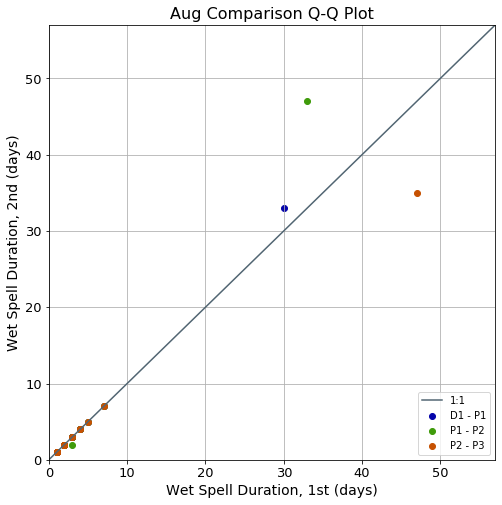

In [303]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugD1Qs, AugP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AugP1Qs, AugP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AugP2Qs, AugP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

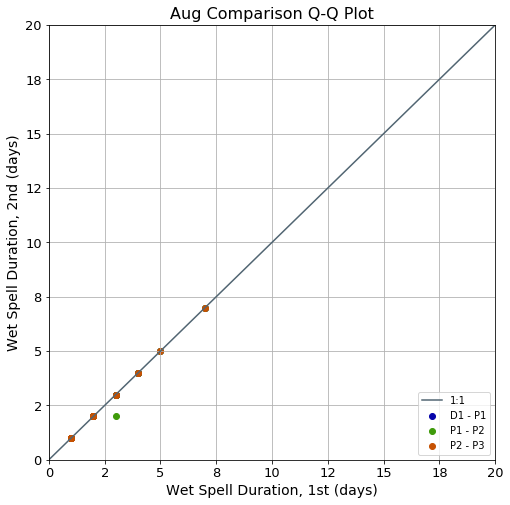

In [304]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugD1Qs, AugP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( AugP1Qs, AugP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( AugP2Qs, AugP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

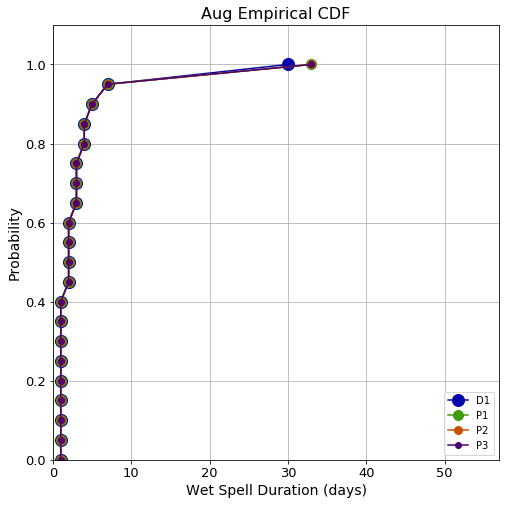

In [305]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AugD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( AugP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( AugP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( AugP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Aug Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [306]:
SepD1BSCI = sstats.bayes_mvs( np.array( SepD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [307]:
SepD1BSCI

(Mean(statistic=2.929590849557075, minmax=(2.925941264561747, 2.933240434552403)),
 Variance(statistic=6.040345687666631, minmax=(6.027660719631117, 6.053030655702144)),
 Std_dev(statistic=2.457711473641003, minmax=(2.45513082734229, 2.4602921199397163)))

In [308]:
SepD1BSCI[0][0], SepD1BSCI[0][1][0], SepD1BSCI[0][1][1]

(2.929590849557075, 2.925941264561747, 2.933240434552403)

In [309]:
SD1Mean.append( SepD1BSCI[0][0] )
SD1MeanMinCI.append( SepD1BSCI[0][1][0] )
SD1MeanMaxCI.append( SepD1BSCI[0][1][1] )
SD1Var.append( SepD1BSCI[1][0] )
SD1VarMinCI.append( SepD1BSCI[1][1][0] )
SD1VarMaxCI.append( SepD1BSCI[1][1][1] )
SD1Std.append( SepD1BSCI[2][0] )
SD1StdMinCI.append( SepD1BSCI[2][1][0] )
SD1StdMaxCI.append( SepD1BSCI[2][1][1] )

In [310]:
SepP1BSCI = sstats.bayes_mvs( np.array( SepP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [311]:
SP1Mean.append( SepP1BSCI[0][0] )
SP1MeanMinCI.append( SepP1BSCI[0][1][0] )
SP1MeanMaxCI.append( SepP1BSCI[0][1][1] )
SP1Var.append( SepP1BSCI[1][0] )
SP1VarMinCI.append( SepP1BSCI[1][1][0] )
SP1VarMaxCI.append( SepP1BSCI[1][1][1] )
SP1Std.append( SepP1BSCI[2][0] )
SP1StdMinCI.append( SepP1BSCI[2][1][0] )
SP1StdMaxCI.append( SepP1BSCI[2][1][1] )

In [312]:
SepP2BSCI = sstats.bayes_mvs( np.array( SepP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [313]:
SP2Mean.append( SepP2BSCI[0][0] )
SP2MeanMinCI.append( SepP2BSCI[0][1][0] )
SP2MeanMaxCI.append( SepP2BSCI[0][1][1] )
SP2Var.append( SepP2BSCI[1][0] )
SP2VarMinCI.append( SepP2BSCI[1][1][0] )
SP2VarMaxCI.append( SepP2BSCI[1][1][1] )
SP2Std.append( SepP2BSCI[2][0] )
SP2StdMinCI.append( SepP2BSCI[2][1][0] )
SP2StdMaxCI.append( SepP2BSCI[2][1][1] )

In [314]:
SepP3BSCI = sstats.bayes_mvs( np.array( SepP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [315]:
SP3Mean.append( SepP3BSCI[0][0] )
SP3MeanMinCI.append( SepP3BSCI[0][1][0] )
SP3MeanMaxCI.append( SepP3BSCI[0][1][1] )
SP3Var.append( SepP3BSCI[1][0] )
SP3VarMinCI.append( SepP3BSCI[1][1][0] )
SP3VarMaxCI.append( SepP3BSCI[1][1][1] )
SP3Std.append( SepP3BSCI[2][0] )
SP3StdMinCI.append( SepP3BSCI[2][1][0] )
SP3StdMaxCI.append( SepP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [316]:
SepTTD1toP1 = sstats.ttest_ind( np.array( SepD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( SepP1DF["Wet_Count"], dtype=np.int32 ) )

In [317]:
SepTTD1toP1Pval = SepTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % SepTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 3.96805e-16


In [318]:
SepTTP1toP2 = sstats.ttest_ind( np.array( SepP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( SepP2DF["Wet_Count"], dtype=np.int32 ) )

In [319]:
SepTTP1toP2Pval = SepTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % SepTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 1.92347e-05


In [320]:
SepTTP2toP3 = sstats.ttest_ind( np.array( SepP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( SepP3DF["Wet_Count"], dtype=np.int32 ) )

In [321]:
SepTTP2toP3Pval = SepTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % SepTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 5.30037e-98


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [322]:
SepMWUD1toP1 = sstats.mannwhitneyu( np.array( SepD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( SepP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [323]:
SepMWUD1toP1Pval = SepMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % SepMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 6.94854e-37


In [324]:
SepMWUP1toP2 = sstats.mannwhitneyu( np.array( SepP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( SepP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [325]:
SepMWUP1toP2Pval = SepMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % SepMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.0150585


In [326]:
SepMWUP2toP3 = sstats.mannwhitneyu( np.array( SepP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( SepP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [327]:
SepMWUP2toP3Pval = SepMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % SepMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 1.2192e-19


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [328]:
SepKWD1toP1 = sstats.kruskal( np.array( SepD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( SepP1DF["Wet_Count"], dtype=np.int32 ) )

In [329]:
SepKWD1toP1Pval = SepKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % SepKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [330]:
SepKWP1toP2 = sstats.kruskal( np.array( SepP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( SepP2DF["Wet_Count"], dtype=np.int32 ) )

In [331]:
SepKWP1toP2Pval = SepKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % SepKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 1


In [332]:
SepKWP2toP3 = sstats.kruskal( np.array( SepP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( SepP3DF["Wet_Count"], dtype=np.int32 ) )

In [333]:
SepKWP2toP3Pval = SepKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % SepKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [334]:
SepD1DF["Wet_Count"].median(), SepP1DF["Wet_Count"].median(), SepP2DF["Wet_Count"].median(), SepP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [335]:
SepD1Qs = SepD1DF["Wet_Count"].quantile(q=nCompQs)
SepP1Qs = SepP1DF["Wet_Count"].quantile(q=nCompQs)
SepP2Qs = SepP2DF["Wet_Count"].quantile(q=nCompQs)
SepP3Qs = SepP3DF["Wet_Count"].quantile(q=nCompQs)

In [336]:
maxQs = max( SepD1Qs.max(), SepP1Qs.max(), SepP2Qs.max(), SepP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

47.0

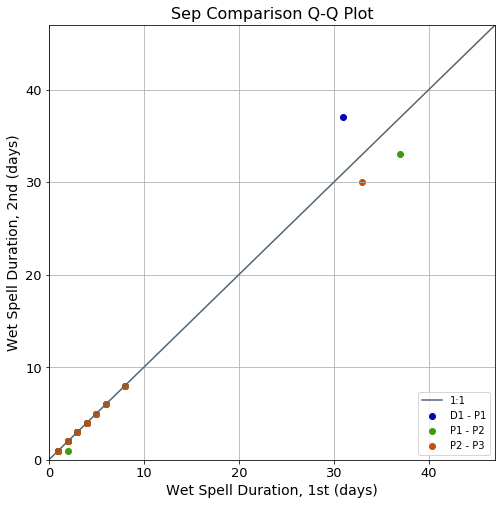

In [337]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepD1Qs, SepP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( SepP1Qs, SepP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( SepP2Qs, SepP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

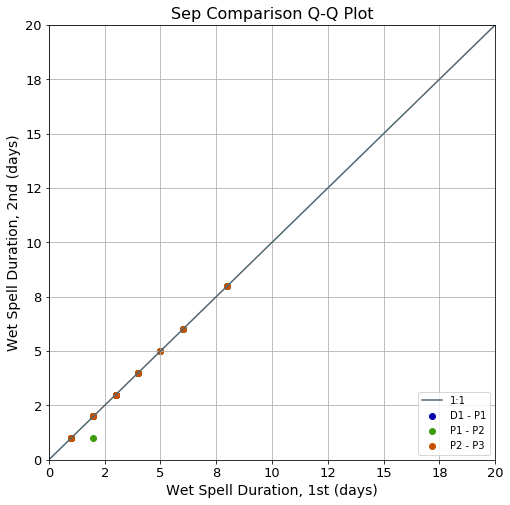

In [338]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepD1Qs, SepP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( SepP1Qs, SepP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( SepP2Qs, SepP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

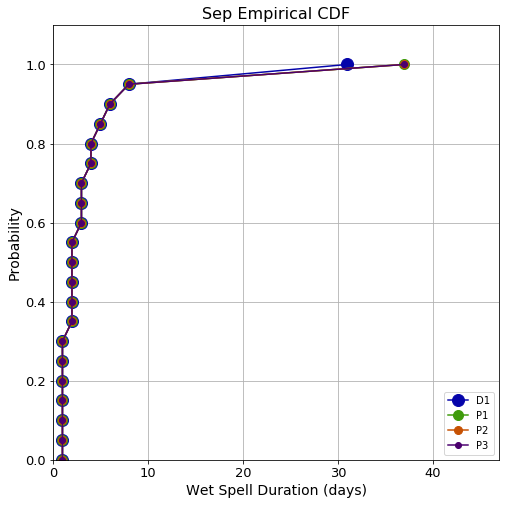

In [339]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SepD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( SepP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( SepP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( SepP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Sep Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [340]:
OctD1BSCI = sstats.bayes_mvs( np.array( OctD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [341]:
OctD1BSCI

(Mean(statistic=2.497473071400374, minmax=(2.494637175982485, 2.5003089668182628)),
 Variance(statistic=3.4260908222130704, minmax=(3.4186673917546937, 3.433514252671447)),
 Std_dev(statistic=1.8509702380678816, minmax=(1.8489649571871567, 1.8529755189486066)))

In [342]:
OctD1BSCI[0][0], OctD1BSCI[0][1][0], OctD1BSCI[0][1][1]

(2.497473071400374, 2.494637175982485, 2.5003089668182628)

In [343]:
SD1Mean.append( OctD1BSCI[0][0] )
SD1MeanMinCI.append( OctD1BSCI[0][1][0] )
SD1MeanMaxCI.append( OctD1BSCI[0][1][1] )
SD1Var.append( OctD1BSCI[1][0] )
SD1VarMinCI.append( OctD1BSCI[1][1][0] )
SD1VarMaxCI.append( OctD1BSCI[1][1][1] )
SD1Std.append( OctD1BSCI[2][0] )
SD1StdMinCI.append( OctD1BSCI[2][1][0] )
SD1StdMaxCI.append( OctD1BSCI[2][1][1] )

In [344]:
OctP1BSCI = sstats.bayes_mvs( np.array( OctP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [345]:
SP1Mean.append( OctP1BSCI[0][0] )
SP1MeanMinCI.append( OctP1BSCI[0][1][0] )
SP1MeanMaxCI.append( OctP1BSCI[0][1][1] )
SP1Var.append( OctP1BSCI[1][0] )
SP1VarMinCI.append( OctP1BSCI[1][1][0] )
SP1VarMaxCI.append( OctP1BSCI[1][1][1] )
SP1Std.append( OctP1BSCI[2][0] )
SP1StdMinCI.append( OctP1BSCI[2][1][0] )
SP1StdMaxCI.append( OctP1BSCI[2][1][1] )

In [346]:
OctP2BSCI = sstats.bayes_mvs( np.array( OctP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [347]:
SP2Mean.append( OctP2BSCI[0][0] )
SP2MeanMinCI.append( OctP2BSCI[0][1][0] )
SP2MeanMaxCI.append( OctP2BSCI[0][1][1] )
SP2Var.append( OctP2BSCI[1][0] )
SP2VarMinCI.append( OctP2BSCI[1][1][0] )
SP2VarMaxCI.append( OctP2BSCI[1][1][1] )
SP2Std.append( OctP2BSCI[2][0] )
SP2StdMinCI.append( OctP2BSCI[2][1][0] )
SP2StdMaxCI.append( OctP2BSCI[2][1][1] )

In [348]:
OctP3BSCI = sstats.bayes_mvs( np.array( OctP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [349]:
SP3Mean.append( OctP3BSCI[0][0] )
SP3MeanMinCI.append( OctP3BSCI[0][1][0] )
SP3MeanMaxCI.append( OctP3BSCI[0][1][1] )
SP3Var.append( OctP3BSCI[1][0] )
SP3VarMinCI.append( OctP3BSCI[1][1][0] )
SP3VarMaxCI.append( OctP3BSCI[1][1][1] )
SP3Std.append( OctP3BSCI[2][0] )
SP3StdMinCI.append( OctP3BSCI[2][1][0] )
SP3StdMaxCI.append( OctP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [350]:
OctTTD1toP1 = sstats.ttest_ind( np.array( OctD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( OctP1DF["Wet_Count"], dtype=np.int32 ) )

In [351]:
OctTTD1toP1Pval = OctTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % OctTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 1.56001e-07


In [352]:
OctTTP1toP2 = sstats.ttest_ind( np.array( OctP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( OctP2DF["Wet_Count"], dtype=np.int32 ) )

In [353]:
OctTTP1toP2Pval = OctTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % OctTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 3.68556e-12


In [354]:
OctTTP2toP3 = sstats.ttest_ind( np.array( OctP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( OctP3DF["Wet_Count"], dtype=np.int32 ) )

In [355]:
OctTTP2toP3Pval = OctTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % OctTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 0.297026


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [356]:
OctMWUD1toP1 = sstats.mannwhitneyu( np.array( OctD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( OctP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [357]:
OctMWUD1toP1Pval = OctMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % OctMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 2.90936e-32


In [358]:
OctMWUP1toP2 = sstats.mannwhitneyu( np.array( OctP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( OctP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [359]:
OctMWUP1toP2Pval = OctMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % OctMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 4.89447e-33


In [360]:
OctMWUP2toP3 = sstats.mannwhitneyu( np.array( OctP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( OctP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [361]:
OctMWUP2toP3Pval = OctMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % OctMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 0.0269489


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [362]:
OctKWD1toP1 = sstats.kruskal( np.array( OctD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( OctP1DF["Wet_Count"], dtype=np.int32 ) )

In [363]:
OctKWD1toP1Pval = OctKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % OctKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [364]:
OctKWP1toP2 = sstats.kruskal( np.array( OctP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( OctP2DF["Wet_Count"], dtype=np.int32 ) )

In [365]:
OctKWP1toP2Pval = OctKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % OctKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [366]:
OctKWP2toP3 = sstats.kruskal( np.array( OctP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( OctP3DF["Wet_Count"], dtype=np.int32 ) )

In [367]:
OctKWP2toP3Pval = OctKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % OctKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 1


In [368]:
OctD1DF["Wet_Count"].median(), OctP1DF["Wet_Count"].median(), OctP2DF["Wet_Count"].median(), OctP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [369]:
OctD1Qs = OctD1DF["Wet_Count"].quantile(q=nCompQs)
OctP1Qs = OctP1DF["Wet_Count"].quantile(q=nCompQs)
OctP2Qs = OctP2DF["Wet_Count"].quantile(q=nCompQs)
OctP3Qs = OctP3DF["Wet_Count"].quantile(q=nCompQs)

In [370]:
maxQs = max( OctD1Qs.max(), OctP1Qs.max(), OctP2Qs.max(), OctP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

38.0

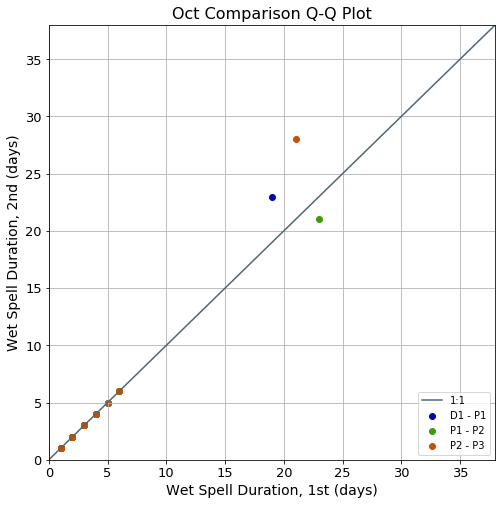

In [371]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctD1Qs, OctP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( OctP1Qs, OctP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( OctP2Qs, OctP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

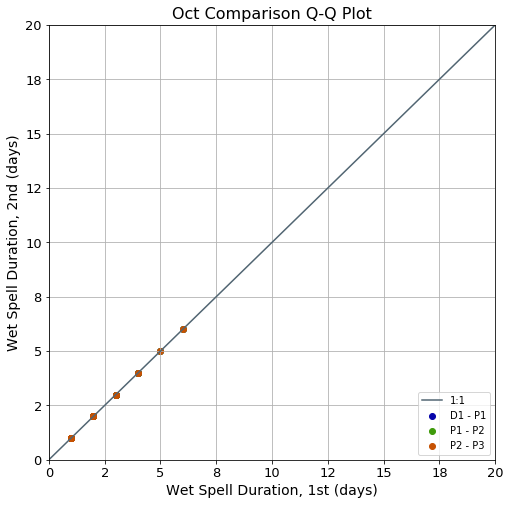

In [372]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctD1Qs, OctP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( OctP1Qs, OctP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( OctP2Qs, OctP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

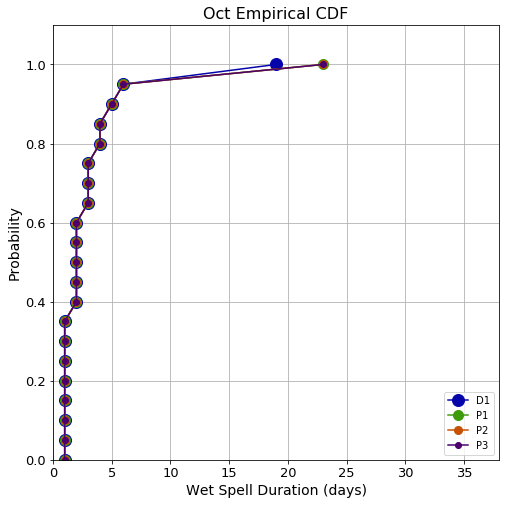

In [373]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( OctD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( OctP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( OctP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( OctP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Oct Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [374]:
NovD1BSCI = sstats.bayes_mvs( np.array( NovD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [375]:
NovD1BSCI

(Mean(statistic=2.1082607963456095, minmax=(2.106020522202654, 2.110501070488565)),
 Variance(statistic=2.1149193569099225, minmax=(2.1103118810316426, 2.1195268327882024)),
 Std_dev(statistic=1.454276231295115, minmax=(1.4526921182569144, 1.4558603443333156)))

In [376]:
NovD1BSCI[0][0], NovD1BSCI[0][1][0], NovD1BSCI[0][1][1]

(2.1082607963456095, 2.106020522202654, 2.110501070488565)

In [377]:
SD1Mean.append( NovD1BSCI[0][0] )
SD1MeanMinCI.append( NovD1BSCI[0][1][0] )
SD1MeanMaxCI.append( NovD1BSCI[0][1][1] )
SD1Var.append( NovD1BSCI[1][0] )
SD1VarMinCI.append( NovD1BSCI[1][1][0] )
SD1VarMaxCI.append( NovD1BSCI[1][1][1] )
SD1Std.append( NovD1BSCI[2][0] )
SD1StdMinCI.append( NovD1BSCI[2][1][0] )
SD1StdMaxCI.append( NovD1BSCI[2][1][1] )

In [378]:
NovP1BSCI = sstats.bayes_mvs( np.array( NovP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [379]:
SP1Mean.append( NovP1BSCI[0][0] )
SP1MeanMinCI.append( NovP1BSCI[0][1][0] )
SP1MeanMaxCI.append( NovP1BSCI[0][1][1] )
SP1Var.append( NovP1BSCI[1][0] )
SP1VarMinCI.append( NovP1BSCI[1][1][0] )
SP1VarMaxCI.append( NovP1BSCI[1][1][1] )
SP1Std.append( NovP1BSCI[2][0] )
SP1StdMinCI.append( NovP1BSCI[2][1][0] )
SP1StdMaxCI.append( NovP1BSCI[2][1][1] )

In [380]:
NovP2BSCI = sstats.bayes_mvs( np.array( NovP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [381]:
SP2Mean.append( NovP2BSCI[0][0] )
SP2MeanMinCI.append( NovP2BSCI[0][1][0] )
SP2MeanMaxCI.append( NovP2BSCI[0][1][1] )
SP2Var.append( NovP2BSCI[1][0] )
SP2VarMinCI.append( NovP2BSCI[1][1][0] )
SP2VarMaxCI.append( NovP2BSCI[1][1][1] )
SP2Std.append( NovP2BSCI[2][0] )
SP2StdMinCI.append( NovP2BSCI[2][1][0] )
SP2StdMaxCI.append( NovP2BSCI[2][1][1] )

In [382]:
NovP3BSCI = sstats.bayes_mvs( np.array( NovP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [383]:
SP3Mean.append( NovP3BSCI[0][0] )
SP3MeanMinCI.append( NovP3BSCI[0][1][0] )
SP3MeanMaxCI.append( NovP3BSCI[0][1][1] )
SP3Var.append( NovP3BSCI[1][0] )
SP3VarMinCI.append( NovP3BSCI[1][1][0] )
SP3VarMaxCI.append( NovP3BSCI[1][1][1] )
SP3Std.append( NovP3BSCI[2][0] )
SP3StdMinCI.append( NovP3BSCI[2][1][0] )
SP3StdMaxCI.append( NovP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [384]:
NovTTD1toP1 = sstats.ttest_ind( np.array( NovD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( NovP1DF["Wet_Count"], dtype=np.int32 ) )

In [385]:
NovTTD1toP1Pval = NovTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % NovTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 2.65096e-07


In [386]:
NovTTP1toP2 = sstats.ttest_ind( np.array( NovP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( NovP2DF["Wet_Count"], dtype=np.int32 ) )

In [387]:
NovTTP1toP2Pval = NovTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % NovTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 0.023153


In [388]:
NovTTP2toP3 = sstats.ttest_ind( np.array( NovP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( NovP3DF["Wet_Count"], dtype=np.int32 ) )

In [389]:
NovTTP2toP3Pval = NovTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % NovTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 6.26398e-15


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [390]:
NovMWUD1toP1 = sstats.mannwhitneyu( np.array( NovD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( NovP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [391]:
NovMWUD1toP1Pval = NovMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % NovMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 4.40888e-09


In [392]:
NovMWUP1toP2 = sstats.mannwhitneyu( np.array( NovP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( NovP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [393]:
NovMWUP1toP2Pval = NovMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % NovMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.00338445


In [394]:
NovMWUP2toP3 = sstats.mannwhitneyu( np.array( NovP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( NovP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [395]:
NovMWUP2toP3Pval = NovMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % NovMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 3.08144e-36


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [396]:
NovKWD1toP1 = sstats.kruskal( np.array( NovD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( NovP1DF["Wet_Count"], dtype=np.int32 ) )

In [397]:
NovKWD1toP1Pval = NovKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % NovKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 1


In [398]:
NovKWP1toP2 = sstats.kruskal( np.array( NovP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( NovP2DF["Wet_Count"], dtype=np.int32 ) )

In [399]:
NovKWP1toP2Pval = NovKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % NovKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [400]:
NovKWP2toP3 = sstats.kruskal( np.array( NovP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( NovP3DF["Wet_Count"], dtype=np.int32 ) )

In [401]:
NovKWP2toP3Pval = NovKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % NovKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 0


In [402]:
NovD1DF["Wet_Count"].median(), NovP1DF["Wet_Count"].median(), NovP2DF["Wet_Count"].median(), NovP3DF["Wet_Count"].median()

(2.0, 2.0, 2.0, 2.0)

#### Plots

In [403]:
NovD1Qs = NovD1DF["Wet_Count"].quantile(q=nCompQs)
NovP1Qs = NovP1DF["Wet_Count"].quantile(q=nCompQs)
NovP2Qs = NovP2DF["Wet_Count"].quantile(q=nCompQs)
NovP3Qs = NovP3DF["Wet_Count"].quantile(q=nCompQs)

In [404]:
maxQs = max( NovD1Qs.max(), NovP1Qs.max(), NovP2Qs.max(), NovP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

32.0

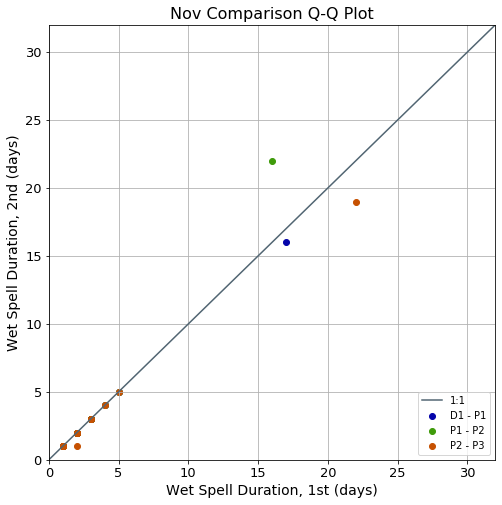

In [405]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovD1Qs, NovP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( NovP1Qs, NovP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( NovP2Qs, NovP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

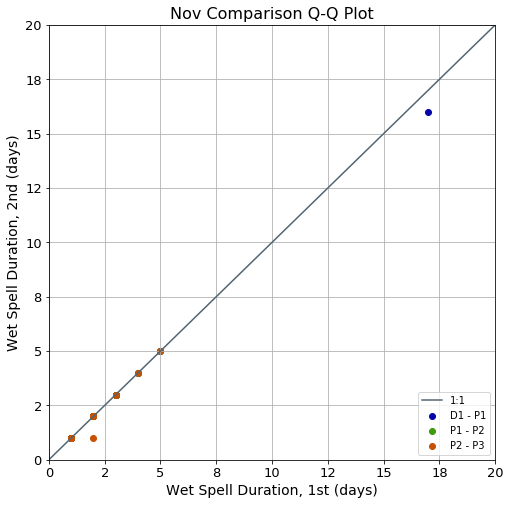

In [406]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovD1Qs, NovP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( NovP1Qs, NovP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( NovP2Qs, NovP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

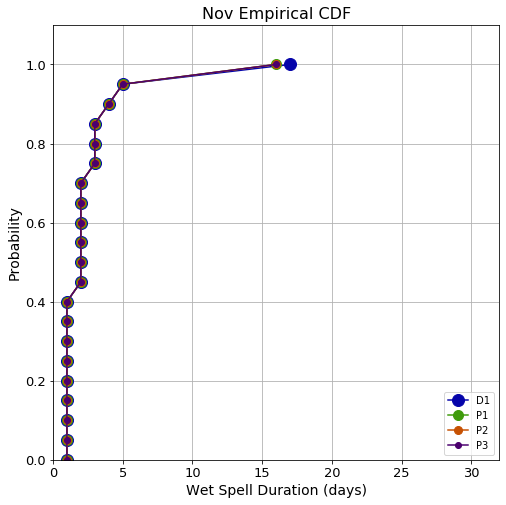

In [407]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( NovD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( NovP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( NovP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( NovP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Nov Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [408]:
DecD1BSCI = sstats.bayes_mvs( np.array( DecD1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [409]:
DecD1BSCI

(Mean(statistic=1.8928961288628334, minmax=(1.8909279894095559, 1.894864268316111)),
 Variance(statistic=1.5646993115234222, minmax=(1.561217651901467, 1.5681809711453774)),
 Std_dev(statistic=1.2508794152608884, minmax=(1.249487730507155, 1.2522711000146218)))

In [410]:
DecD1BSCI[0][0], DecD1BSCI[0][1][0], DecD1BSCI[0][1][1]

(1.8928961288628334, 1.8909279894095559, 1.894864268316111)

In [411]:
SD1Mean.append( DecD1BSCI[0][0] )
SD1MeanMinCI.append( DecD1BSCI[0][1][0] )
SD1MeanMaxCI.append( DecD1BSCI[0][1][1] )
SD1Var.append( DecD1BSCI[1][0] )
SD1VarMinCI.append( DecD1BSCI[1][1][0] )
SD1VarMaxCI.append( DecD1BSCI[1][1][1] )
SD1Std.append( DecD1BSCI[2][0] )
SD1StdMinCI.append( DecD1BSCI[2][1][0] )
SD1StdMaxCI.append( DecD1BSCI[2][1][1] )

In [412]:
DecP1BSCI = sstats.bayes_mvs( np.array( DecP1DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [413]:
SP1Mean.append( DecP1BSCI[0][0] )
SP1MeanMinCI.append( DecP1BSCI[0][1][0] )
SP1MeanMaxCI.append( DecP1BSCI[0][1][1] )
SP1Var.append( DecP1BSCI[1][0] )
SP1VarMinCI.append( DecP1BSCI[1][1][0] )
SP1VarMaxCI.append( DecP1BSCI[1][1][1] )
SP1Std.append( DecP1BSCI[2][0] )
SP1StdMinCI.append( DecP1BSCI[2][1][0] )
SP1StdMaxCI.append( DecP1BSCI[2][1][1] )

In [414]:
DecP2BSCI = sstats.bayes_mvs( np.array( DecP2DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [415]:
SP2Mean.append( DecP2BSCI[0][0] )
SP2MeanMinCI.append( DecP2BSCI[0][1][0] )
SP2MeanMaxCI.append( DecP2BSCI[0][1][1] )
SP2Var.append( DecP2BSCI[1][0] )
SP2VarMinCI.append( DecP2BSCI[1][1][0] )
SP2VarMaxCI.append( DecP2BSCI[1][1][1] )
SP2Std.append( DecP2BSCI[2][0] )
SP2StdMinCI.append( DecP2BSCI[2][1][0] )
SP2StdMaxCI.append( DecP2BSCI[2][1][1] )

In [416]:
DecP3BSCI = sstats.bayes_mvs( np.array( DecP3DF["Wet_Count"], dtype=np.int32 ), alpha=0.9 )

In [417]:
SP3Mean.append( DecP3BSCI[0][0] )
SP3MeanMinCI.append( DecP3BSCI[0][1][0] )
SP3MeanMaxCI.append( DecP3BSCI[0][1][1] )
SP3Var.append( DecP3BSCI[1][0] )
SP3VarMinCI.append( DecP3BSCI[1][1][0] )
SP3VarMaxCI.append( DecP3BSCI[1][1][1] )
SP3Std.append( DecP3BSCI[2][0] )
SP3StdMinCI.append( DecP3BSCI[2][1][0] )
SP3StdMaxCI.append( DecP3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [418]:
DecTTD1toP1 = sstats.ttest_ind( np.array( DecD1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( DecP1DF["Wet_Count"], dtype=np.int32 ) )

In [419]:
DecTTD1toP1Pval = DecTTD1toP1[1]
print("P-Value for LOCA D1 and P1 from same population is: %g" % DecTTD1toP1Pval )

P-Value for LOCA D1 and P1 from same population is: 3.04203e-74


In [420]:
DecTTP1toP2 = sstats.ttest_ind( np.array( DecP1DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( DecP2DF["Wet_Count"], dtype=np.int32 ) )

In [421]:
DecTTP1toP2Pval = DecTTP1toP2[1]
print("P-Value for LOCA P1 and P2 from same population is: %g" % DecTTP1toP2Pval )

P-Value for LOCA P1 and P2 from same population is: 2.48835e-15


In [422]:
DecTTP2toP3 = sstats.ttest_ind( np.array( DecP2DF["Wet_Count"], dtype=np.int32 ), 
                                np.array( DecP3DF["Wet_Count"], dtype=np.int32 ) )

In [423]:
DecTTP2toP3Pval = DecTTP2toP3[1]
print("P-Value for LOCA P2 and P3 from same population is: %g" % DecTTP2toP3Pval )

P-Value for LOCA P2 and P3 from same population is: 1.57095e-13


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [424]:
DecMWUD1toP1 = sstats.mannwhitneyu( np.array( DecD1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( DecP1DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [425]:
DecMWUD1toP1Pval = DecMWUD1toP1[1]
print("P-Value for LOCA D1 and P1 from same distribution is: %g" % DecMWUD1toP1Pval )

P-Value for LOCA D1 and P1 from same distribution is: 2.5752e-53


In [426]:
DecMWUP1toP2 = sstats.mannwhitneyu( np.array( DecP1DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( DecP2DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [427]:
DecMWUP1toP2Pval = DecMWUP1toP2[1]
print("P-Value for LOCA P1 and P2 from same distribution is: %g" % DecMWUP1toP2Pval )

P-Value for LOCA P1 and P2 from same distribution is: 0.00841768


In [428]:
DecMWUP2toP3 = sstats.mannwhitneyu( np.array( DecP2DF["Wet_Count"], dtype=np.int32 ), 
                                    np.array( DecP3DF["Wet_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [429]:
DecMWUP2toP3Pval = DecMWUP2toP3[1]
print("P-Value for LOCA P2 and P3 from same distribution is: %g" % DecMWUP2toP3Pval )

P-Value for LOCA P2 and P3 from same distribution is: 2.34323e-18


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [430]:
DecKWD1toP1 = sstats.kruskal( np.array( DecD1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( DecP1DF["Wet_Count"], dtype=np.int32 ) )

In [431]:
DecKWD1toP1Pval = DecKWD1toP1[1]
print("P-Value for LOCA D1 and P1  have the same median is: %g" % DecKWD1toP1Pval )

P-Value for LOCA D1 and P1  have the same median is: 0


In [432]:
DecKWP1toP2 = sstats.kruskal( np.array( DecP1DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( DecP2DF["Wet_Count"], dtype=np.int32 ) )

In [433]:
DecKWP1toP2Pval = DecKWP1toP2[1]
print("P-Value for LOCA P1 and P2  have the same median is: %g" % DecKWP1toP2Pval )

P-Value for LOCA P1 and P2  have the same median is: 0


In [434]:
DecKWP2toP3 = sstats.kruskal( np.array( DecP2DF["Wet_Count"], dtype=np.int32 ), 
                              np.array( DecP3DF["Wet_Count"], dtype=np.int32 ) )

In [435]:
DecKWP2toP3Pval = DecKWP2toP3[1]
print("P-Value for LOCA P2 and P3  have the same median is: %g" % DecKWP2toP3Pval )

P-Value for LOCA P2 and P3  have the same median is: 0


In [436]:
DecD1DF["Wet_Count"].median(), DecP1DF["Wet_Count"].median(), DecP2DF["Wet_Count"].median(), DecP3DF["Wet_Count"].median()

(1.0, 1.0, 1.0, 1.0)

#### Plots

In [437]:
DecD1Qs = DecD1DF["Wet_Count"].quantile(q=nCompQs)
DecP1Qs = DecP1DF["Wet_Count"].quantile(q=nCompQs)
DecP2Qs = DecP2DF["Wet_Count"].quantile(q=nCompQs)
DecP3Qs = DecP3DF["Wet_Count"].quantile(q=nCompQs)

In [438]:
maxQs = max( DecD1Qs.max(), DecP1Qs.max(), DecP2Qs.max(), DecP3Qs.max() )
maxQs = maxQs + 10.0
maxQs

26.0

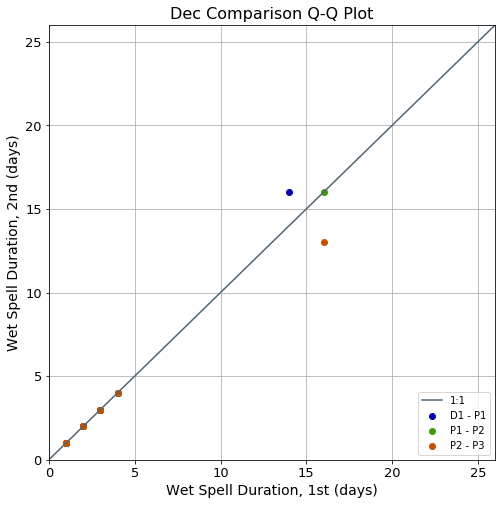

In [439]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecD1Qs, DecP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( DecP1Qs, DecP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( DecP2Qs, DecP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

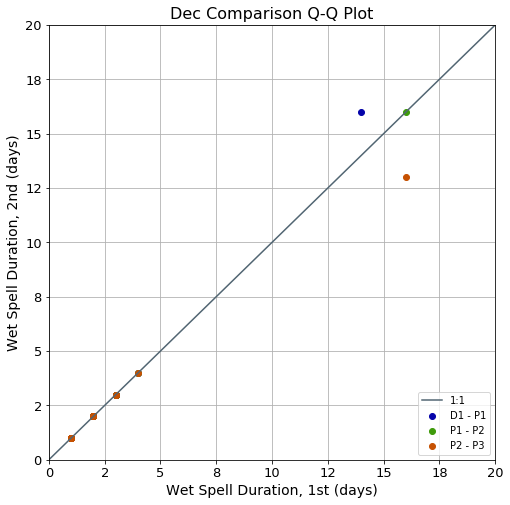

In [440]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecD1Qs, DecP1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( DecP1Qs, DecP2Qs, c='xkcd:grass green', marker='o', label="P1 - P2")
ax11.scatter( DecP2Qs, DecP3Qs, c='xkcd:dark orange', marker='o', label="P2 - P3")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Wet Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

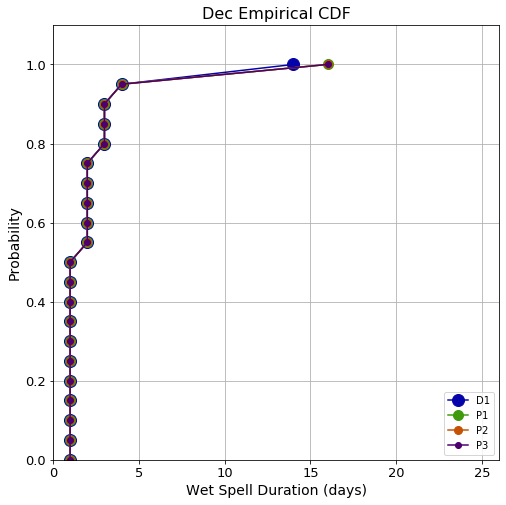

In [441]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( DecD1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( DecP1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( DecP1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( DecP1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Dec Empirical CDF', fontsize=16 )
ax11.set_xlabel('Wet Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Final Collations, Plots, and Outputs

In [442]:
DataDict = { "Min CI Mean" : np.array( SD1MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SD1Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SD1MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SD1VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SD1Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SD1VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SD1StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SD1Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SD1StdMaxCI, dtype=np.float32 ), #8
}
D1BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [443]:
BSCIHds = list( D1BayStatsCIDF.columns )

In [444]:
display( HTML( D1BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,1.860158,1.862078,1.863998,1.378317,1.381508,1.384699,1.174018,1.175376,1.176733
2,1.984072,1.986150,1.988227,1.632790,1.636548,1.640306,1.277807,1.279276,1.280745
3,1.892755,1.894751,1.896747,1.613699,1.617288,1.620877,1.270315,1.271726,1.273137
4,2.299245,2.301874,2.304502,3.183703,3.190343,3.196983,1.784294,1.786153,1.788012
5,2.689106,2.692112,2.695119,4.902743,4.912168,4.921593,2.214215,2.216341,2.218467
6,2.911320,2.915002,2.918684,6.194769,6.207742,6.220715,2.488931,2.491534,2.494138
7,2.622509,2.626201,2.629894,5.259205,5.271194,5.283182,2.293297,2.295908,2.298519
8,2.617833,2.621325,2.624817,4.887104,4.898033,4.908961,2.210681,2.213150,2.215619
9,2.925941,2.929591,2.933240,6.027661,6.040346,6.053030,2.455131,2.457711,2.460292
10,2.494637,2.497473,2.500309,3.418667,3.426091,3.433514,1.848965,1.850970,1.852975


In [445]:
DataDict = { "Min CI Mean" : np.array( SP1MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SP1Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SP1MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SP1VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SP1Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SP1VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SP1StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SP1Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SP1StdMaxCI, dtype=np.float32 ), #8
}
P1BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [446]:
display( HTML( P1BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,1.803609,1.805530,1.807451,1.274871,1.277942,1.281013,1.129103,1.130461,1.131819
2,1.955753,1.957849,1.959945,1.603642,1.607400,1.611158,1.266351,1.267833,1.269315
3,1.909721,1.911754,1.913786,1.635152,1.638832,1.642511,1.278731,1.280169,1.281606
4,2.251469,2.253991,2.256514,2.871782,2.877834,2.883886,1.694634,1.696418,1.698202
5,2.660775,2.663848,2.666922,4.997972,5.007698,5.017425,2.235615,2.237789,2.239962
6,2.949208,2.953033,2.956858,6.482535,6.496323,6.510110,2.546084,2.548789,2.551493
7,2.628472,2.632299,2.636126,5.402519,5.415113,5.427707,2.324333,2.327039,2.329746
8,2.572013,2.575638,2.579262,5.075275,5.086837,5.098398,2.252839,2.255402,2.257965
9,2.899907,2.903666,2.907426,6.256477,6.269791,6.283106,2.501297,2.503955,2.506614
10,2.481607,2.484517,2.487427,3.462659,3.470326,3.477992,1.860823,1.862881,1.864939


In [447]:
DataDict = { "Min CI Mean" : np.array( SP2MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SP2Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SP2MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SP2VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SP2Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SP2VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SP2StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SP2Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SP2StdMaxCI, dtype=np.float32 ), #8
}
P2BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [448]:
display( HTML( P2BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,1.782570,1.784445,1.786321,1.182878,1.185766,1.188654,1.087603,1.088929,1.090255
2,1.933224,1.935286,1.937348,1.508671,1.512257,1.515843,1.228280,1.229739,1.231197
3,1.883005,1.885040,1.887075,1.556298,1.559892,1.563486,1.247517,1.248956,1.250395
4,2.274572,2.277225,2.279877,3.085208,3.091805,3.098401,1.756477,1.758353,1.760228
5,2.659882,2.662997,2.666112,4.948130,4.957940,4.967751,2.224440,2.226643,2.228846
6,2.952463,2.956322,2.960182,6.458900,6.472785,6.486671,2.541438,2.544167,2.546896
7,2.621419,2.625297,2.629175,5.486238,5.499099,5.511961,2.342273,2.345016,2.347758
8,2.586379,2.590146,2.593913,5.348403,5.360738,5.373072,2.312663,2.315327,2.317990
9,2.913710,2.917455,2.921200,6.115926,6.129036,6.142147,2.473041,2.475689,2.478337
10,2.464075,2.467021,2.469968,3.467751,3.475520,3.483289,1.862191,1.864275,1.866358


In [449]:
DataDict = { "Min CI Mean" : np.array( SP3MeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SP3Mean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SP3MeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SP3VarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SP3Var, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SP3VarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SP3StdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SP3Std, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SP3StdMaxCI, dtype=np.float32 ), #8
}
P3BayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [450]:
display( HTML( P3BayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,1.784461,1.786410,1.788360,1.206966,1.209998,1.213031,1.098621,1.099999,1.101378
2,1.917732,1.919848,1.921964,1.484082,1.487732,1.491382,1.218230,1.219726,1.221222
3,1.861632,1.863620,1.865608,1.425555,1.428916,1.432276,1.193967,1.195373,1.196778
4,2.250859,2.253524,2.256190,2.943847,2.950322,2.956798,1.715765,1.717650,1.719535
5,2.611490,2.614592,2.617694,4.703523,4.713046,4.722569,2.168762,2.170955,2.173148
6,2.933109,2.937227,2.941344,6.895278,6.910586,6.925894,2.625888,2.628799,2.631711
7,2.613431,2.617547,2.621663,5.809295,5.823341,5.837388,2.410249,2.413160,2.416070
8,2.597394,2.601494,2.605593,5.821023,5.835027,5.849030,2.412681,2.415580,2.418478
9,2.983869,2.987932,2.991996,6.809255,6.824266,6.839277,2.609457,2.612330,2.615203
10,2.466645,2.469721,2.472796,3.525191,3.533367,3.541542,1.877550,1.879725,1.881900


In [451]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "WetDayComp_LOCAProjs.xlsx" ) )
with pd.ExcelWriter( OutFiler ) as writer:
    D1BayStatsCIDF.to_excel( writer, sheet_name="LOCA_D1_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P1BayStatsCIDF.to_excel( writer, sheet_name="LOCA_P1_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P2BayStatsCIDF.to_excel( writer, sheet_name="LOCA_P2_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P3BayStatsCIDF.to_excel( writer, sheet_name="LOCA_P3_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )    

Plot the monthly confidence intervals with statistic

In [452]:
D1MeanCI = np.append( np.stack( [np.array(D1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(D1BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(D1BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D1MeanCI = np.vstack( [D1MeanCI[:,:], D1MeanCI[0,:]] )

In [453]:
P1MeanCI = np.append( np.stack( [np.array(P1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P1BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P1BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P1MeanCI = np.vstack( [P1MeanCI[:,:], P1MeanCI[0,:]] )

In [454]:
P2MeanCI = np.append( np.stack( [np.array(P2BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P2BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P2BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P2BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P2MeanCI = np.vstack( [P2MeanCI[:,:], P2MeanCI[0,:]] )

In [455]:
P3MeanCI = np.append( np.stack( [np.array(P3BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P3BayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P3BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P3BayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P3MeanCI = np.vstack( [P3MeanCI[:,:], P3MeanCI[0,:]] )

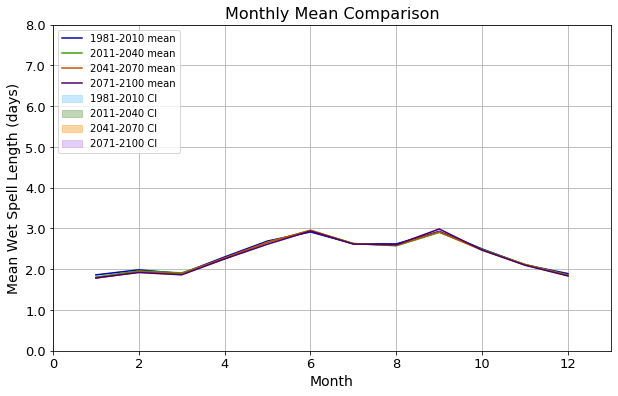

In [469]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 mean" )
ax11.fill( D1MeanCI[:,0], D1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 mean" )
ax11.fill( P1MeanCI[:,0], P1MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[1]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 mean" )
ax11.fill( P2MeanCI[:,0], P2MeanCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[1]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 mean" )
ax11.fill( P3MeanCI[:,0], P3MeanCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_title('Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 8.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

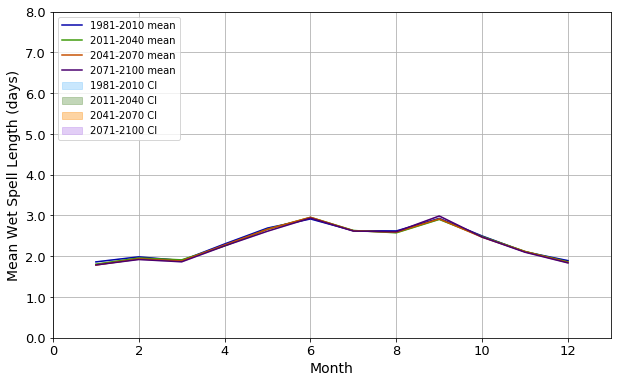

In [468]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 mean" )
ax11.fill( D1MeanCI[:,0], D1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 mean" )
ax11.fill( P1MeanCI[:,0], P1MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[1]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 mean" )
ax11.fill( P2MeanCI[:,0], P2MeanCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[1]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 mean" )
ax11.fill( P3MeanCI[:,0], P3MeanCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 8.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [458]:
D1VarCI = np.append( np.stack( [np.array(D1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(D1BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(D1BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D1VarCI = np.vstack( [D1VarCI[:,:], D1VarCI[0,:]] )

In [459]:
P1VarCI = np.append( np.stack( [np.array(P1BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P1BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P1BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P1BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P1VarCI = np.vstack( [P1VarCI[:,:], P1VarCI[0,:]] )

In [460]:
P2VarCI = np.append( np.stack( [np.array(P2BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P2BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P2BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P2BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P2VarCI = np.vstack( [P2VarCI[:,:], P2VarCI[0,:]] )

In [461]:
P3VarCI = np.append( np.stack( [np.array(P3BayStatsCIDF.index, dtype=np.float32 ),
                          np.array(P3BayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P3BayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(P3BayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P3VarCI = np.vstack( [P3VarCI[:,:], P3VarCI[0,:]] )

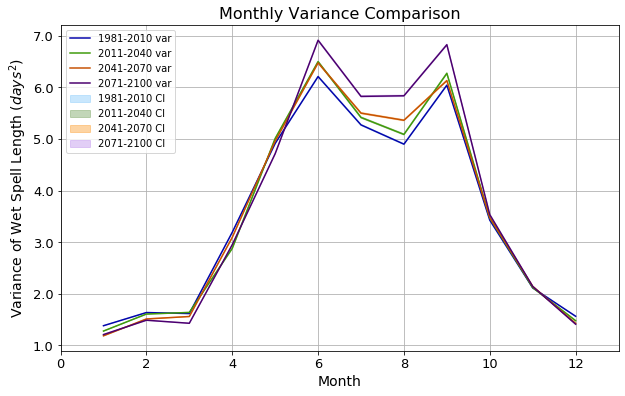

In [464]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 var" )
ax11.fill( D1VarCI[:,0], D1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 var" )
ax11.fill( P1VarCI[:,0], P1VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[4]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 var" )
ax11.fill( P2VarCI[:,0], P2VarCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[4]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 var" )
ax11.fill( P3VarCI[:,0], P3VarCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_title('Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

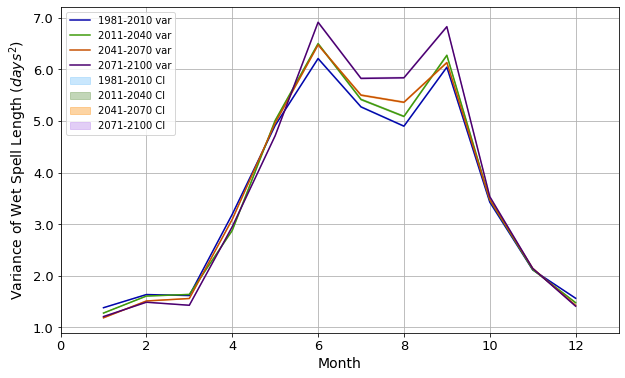

In [465]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D1BayStatsCIDF.index, D1BayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010 var" )
ax11.fill( D1VarCI[:,0], D1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 CI")
ax11.plot( P1BayStatsCIDF.index, P1BayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="2011-2040 var" )
ax11.fill( P1VarCI[:,0], P1VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="2011-2040 CI")
ax11.plot( P2BayStatsCIDF.index, P2BayStatsCIDF[BSCIHds[4]], color="xkcd:dark orange", 
           linestyle="-", label="2041-2070 var" )
ax11.fill( P2VarCI[:,0], P2VarCI[:,1], color="xkcd:light orange", alpha=0.5, 
           label="2041-2070 CI")
ax11.plot( P3BayStatsCIDF.index, P3BayStatsCIDF[BSCIHds[4]], color="xkcd:royal purple", 
           linestyle="-", label="2071-2100 var" )
ax11.fill( P3VarCI[:,0], P3VarCI[:,1], color="xkcd:lavender", alpha=0.5, 
           label="2071-2100 CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )